In [30]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# pd.set_option('display.max_rows', None)

plots_folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/RotationalAnalysis/Plots'

folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/RotationalAnalysis/FinalAnalysis'
analysis_file = 'RotationalAnalysis_combined.csv'

df = pd.read_csv(os.path.join(folder, analysis_file))

df['angular speed (1/s)'] = (df['angular velocity x']**2 + df['angular velocity y']**2 + df['angular velocity z']**2)**(1/2)
df['no:of vorticella'] = np.nan
# No:of vorticella mapping
df_num_vorticella = pd.read_csv(os.path.join(folder, 'Sphere_Vorticella_numbers.csv'))

left_wall = -15
right_wall = 15

for ii in range(len(df_num_vorticella)):
    
    track_id = df_num_vorticella['track ID'][ii]
    
    df['no:of vorticella'].loc[df['track ID'] == track_id] = int(df_num_vorticella['number of vorticella'][ii])
  
# Note diameter is mislabelled as radius
df['object radius (mm)'] = df['object diameter (mm)']
df['object diameter (mm)'] = None
df

C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Time (s)   track ID  \
0              0             0               0      3.21  Sphere003   
1              1             1               1      4.62  Sphere003   
2              2             2               2      5.99  Sphere003   
3              3             3               3      7.42  Sphere003   
4              4             4               4      8.79  Sphere003   
...          ...           ...             ...       ...        ...   
1005          17            17              17     45.56  Sphere015   
1006          18            18              18     47.17  Sphere015   
1007          19            19              19     48.76  Sphere015   
1008          20            20              20     50.41  Sphere015   
1009          21            21              21     52.02  Sphere015   

                                             track file  angular velocity x  \
0     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011282   
1     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011616   
2     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.009606   
3     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.004739   
4     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.005074   
...                                                 ...                 ...   
1005  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000307   
1006  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.001029   
1007  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.002599   
1008  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000207   
1009  D:/Vorticella_GravityMachine/2019_08_23/track8...           -0.004495   

      angular velocity y  angular velocity z object diameter (mm)  \
0               0.011064            0.003670                 None   
1               0.007746            0.001117                 None   
2               0.008493           -0.002662                 None   
3               0.014169           -0.006719                 None   
4               0.020293           -0.009254                 None   
...                  ...                 ...                  ...   
1005           -0.003121            0.000018                 None   
1006           -0.001388            0.001920                 None   
1007            0.000316           -0.001841                 None   
1008           -0.000068           -0.000577                 None   
1009           -0.003277            0.000649                 None   

                                         new track file  X pos (mm)  \
0     E:/GravityMachine_Deepak/Vorticella_GM_Montere...   -5.674000   
1                                                   NaN   -5.660835   
2                                                   NaN   -5.664252   
3                                                   NaN   -5.652000   
4                                                   NaN   -5.643028   
...                                                 ...         ...   
1005                                                NaN    4.638000   
1006                                                NaN    4.660048   
1007                                                NaN    4.684000   
1008                                                NaN    4.710000   
1009                                                NaN    4.732497   

      Y pos (mm)  Front wall (mm)  Back wall (mm)  angular speed (1/s)  \
0        1.42200             -0.5             4.5             0.016223   
1        1.42200             -0.5             4.5             0.014006   
2        1.42562             -0.5             4.5             0.013096   
3        1.41600             -0.5             4.5             0.016382   
4        1.38200             -0.5             4.5             0.022873   
...          ...              ...             ...                  ...   
1005

In [12]:
# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [5, 5]
   }
rcParams.update(params)
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
# rcParams.update({'font.size': 24})
sns.set_style("ticks")


# Estimate for rotation rate based on known vorticella parameters

In [34]:

F_vorticella = 200e-12 # Point force due to Vorticella
a = 1e-3*np.nanmean(df['object radius (mm)'])
print("mean aggregate radius: {} mm".format(1000*a))
mu_water = 0.001 # Viscosity of water in Pa.s
# \Omega = F/(8\pi \mu a^2)
Omega = F_vorticella/(8*np.pi*mu_water*a**2)

print("Predicted rotation rate {} 1/s".format(Omega))


mean aggregate radius: 0.5256237623762375 mm
Predicted rotation rate 0.028803161190727615 1/s


In [35]:
# Scale the angular velocity based on the rotation rate due to single vorticella force
df['Dimensionless rotation rate'] = None
df['Dimensionless rotation rate'] = df['angular speed (1/s)']*8*np.pi*mu_water*((df['object radius (mm)']*1e-3)**2)/F_vorticella

df

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Time (s)   track ID  \
0              0             0               0      3.21  Sphere003   
1              1             1               1      4.62  Sphere003   
2              2             2               2      5.99  Sphere003   
3              3             3               3      7.42  Sphere003   
4              4             4               4      8.79  Sphere003   
...          ...           ...             ...       ...        ...   
1005          17            17              17     45.56  Sphere015   
1006          18            18              18     47.17  Sphere015   
1007          19            19              19     48.76  Sphere015   
1008          20            20              20     50.41  Sphere015   
1009          21            21              21     52.02  Sphere015   

                                             track file  angular velocity x  \
0     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011282   
1     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011616   
2     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.009606   
3     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.004739   
4     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.005074   
...                                                 ...                 ...   
1005  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000307   
1006  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.001029   
1007  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.002599   
1008  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000207   
1009  D:/Vorticella_GravityMachine/2019_08_23/track8...           -0.004495   

      angular velocity y  angular velocity z object diameter (mm)  ...  \
0               0.011064            0.003670                 None  ...   
1               0.007746            0.001117                 None  ...   
2               0.008493           -0.002662                 None  ...   
3               0.014169           -0.006719                 None  ...   
4               0.020293           -0.009254                 None  ...   
...                  ...                 ...                  ...  ...   
1005           -0.003121            0.000018                 None  ...   
1006           -0.001388            0.001920                 None  ...   
1007            0.000316           -0.001841                 None  ...   
1008           -0.000068           -0.000577                 None  ...   
1009           -0.003277            0.000649                 None  ...   

     X pos (mm)  Y pos (mm)  Front wall (mm)  Back wall (mm)  \
0     -5.674000     1.42200             -0.5             4.5   
1     -5.660835     1.42200             -0.5             4.5   
2     -5.664252     1.42562             -0.5             4.5   
3     -5.652000     1.41600             -0.5             4.5   
4     -5.643028     1.38200             -0.5             4.5   
...         ...         ...              ...             ...   
1005   4.638000    -1.14200              0.4            -4.6   
1006   4.660048    -1.14200              0.4            -4.6   
1007   4.684000    -1.14200              0.4            -4.6   
1008   4.710000    -1.14200              0.4            -4.6   
1009   4.732497    -1.14400              0.4            -4.6   

      angular speed (1/s)  no:of vorticella  object radius (mm)  \
0                0.016223               1.0               0.381   
1                0.014006               1.0               0.381   
2                0.013096               1.0               0.381   
3                0.016382               1.0               0.381   
4                0.022873               1.0               0.381   
...                   ...               ...                 ...   
1005             0.003136               0.0               0.815   
1006      

<IPython.core.display.Javascript object>


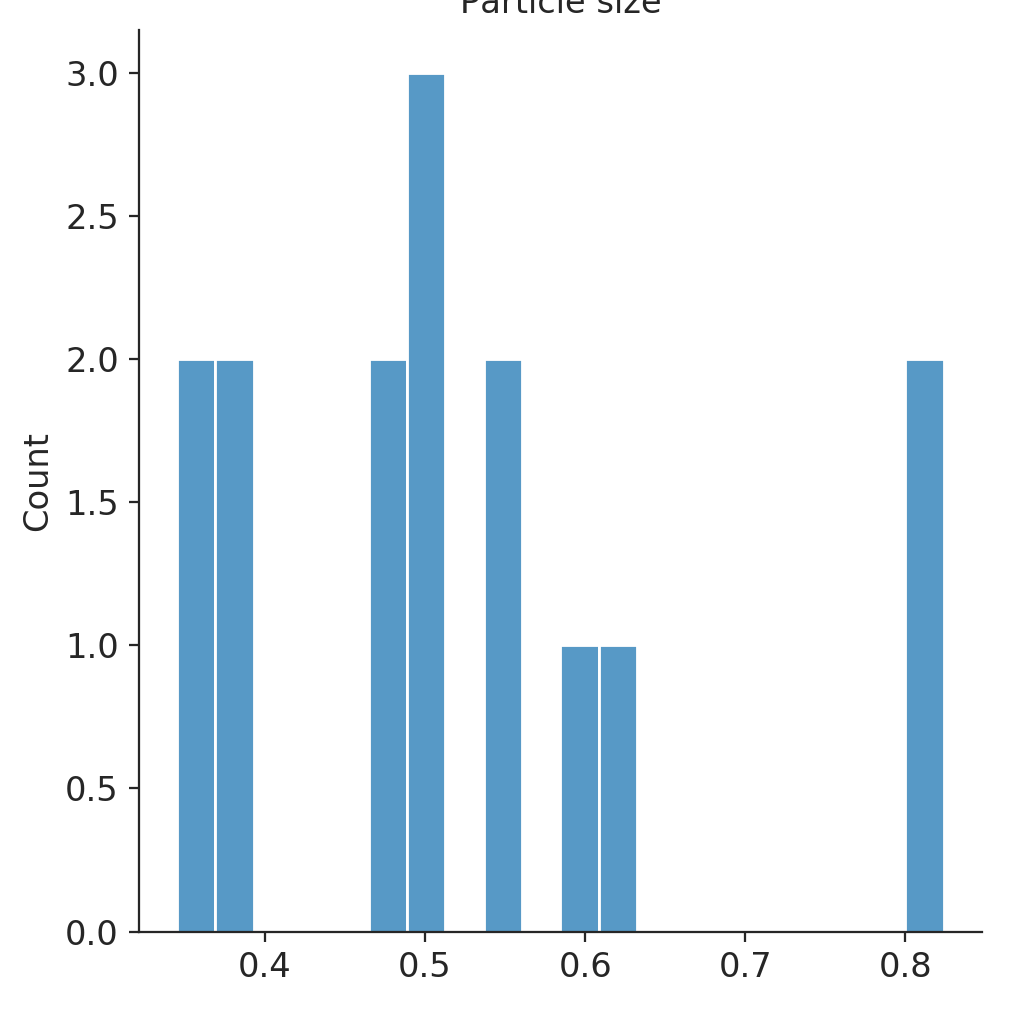

In [15]:
# Slice the data to only include a certain size range of particles
# Particle size histogram

particle_sizes = np.unique(df["object radius (mm)"])

title = 'Particle size'
sns.displot(x= particle_sizes, bins = 20, stat="count", kde=False, palette="Set2")
plt.title(title)
plt.show()


## Divide data into sub-groups for analysis

In [5]:
# Choose the size window between 450um and 625 um (radius)

df = df.loc[(df['object radius (mm)'] >= 0.450) & (df['object radius (mm)'] <= 0.625)]
df

mean_particle_size = np.mean(df['object radius (mm)'])
print(mean_particle_size)

0.5068440366972478


In [16]:
''' Divide data into groups based on no:of vorticella
    Group 1: No vorticella
    Group 2: 1-3 Vorticella
    Group 3: 4-7 vorticella
'''
df['no:of vorticella (grouped)'] = None
for ii in range(len(df)):
    if(df['no:of vorticella'][ii] == 0):
        df['no:of vorticella (grouped)'][ii] = 'No vorticella'
    elif (df['no:of vorticella'][ii] >= 1 and df['no:of vorticella'][ii] <=3):
        df['no:of vorticella (grouped)'][ii] = '1-3 vorticella'
    elif(df['no:of vorticella'][ii] > 3):
        df['no:of vorticella (grouped)'][ii] = '>3 vorticella'

df

C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Time (s)   track ID  \
0              0             0               0      3.21  Sphere003   
1              1             1               1      4.62  Sphere003   
2              2             2               2      5.99  Sphere003   
3              3             3               3      7.42  Sphere003   
4              4             4               4      8.79  Sphere003   
...          ...           ...             ...       ...        ...   
1005          17            17              17     45.56  Sphere015   
1006          18            18              18     47.17  Sphere015   
1007          19            19              19     48.76  Sphere015   
1008          20            20              20     50.41  Sphere015   
1009          21            21              21     52.02  Sphere015   

                                             track file  angular velocity x  \
0     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011282   
1     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011616   
2     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.009606   
3     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.004739   
4     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.005074   
...                                                 ...                 ...   
1005  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000307   
1006  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.001029   
1007  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.002599   
1008  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000207   
1009  D:/Vorticella_GravityMachine/2019_08_23/track8...           -0.004495   

      angular velocity y  angular velocity z object diameter (mm)  \
0               0.011064            0.003670                 None   
1               0.007746            0.001117                 None   
2               0.008493           -0.002662                 None   
3               0.014169           -0.006719                 None   
4               0.020293           -0.009254                 None   
...                  ...                 ...                  ...   
1005           -0.003121            0.000018                 None   
1006           -0.001388            0.001920                 None   
1007            0.000316           -0.001841                 None   
1008           -0.000068           -0.000577                 None   
1009           -0.003277            0.000649                 None   

                                         new track file  X pos (mm)  \
0     E:/GravityMachine_Deepak/Vorticella_GM_Montere...   -5.674000   
1                                                   NaN   -5.660835   
2                                                   NaN   -5.664252   
3                                                   NaN   -5.652000   
4                                                   NaN   -5.643028   
...                                                 ...         ...   
1005                                                NaN    4.638000   
1006                                                NaN    4.660048   
1007                                                NaN    4.684000   
1008                                                NaN    4.710000   
1009                                                NaN    4.732497   

      Y pos (mm)  Front wall (mm)  Back wall (mm)  angular speed (1/s)  \
0        1.42200             -0.5             4.5             0.016223   
1        1.42200             -0.5             4.5             0.014006   
2        1.42562             -0.5             4.5             0.013096   
3        1.41600             -0.5             4.5             0.016382   
4        1.38200             -0.5             4.5             0.022873   
...          ...              ...             ...                  ...   
1005

## Rotation rate distribution (dimensional) vs no:of vorticella

<IPython.core.display.Javascript object>


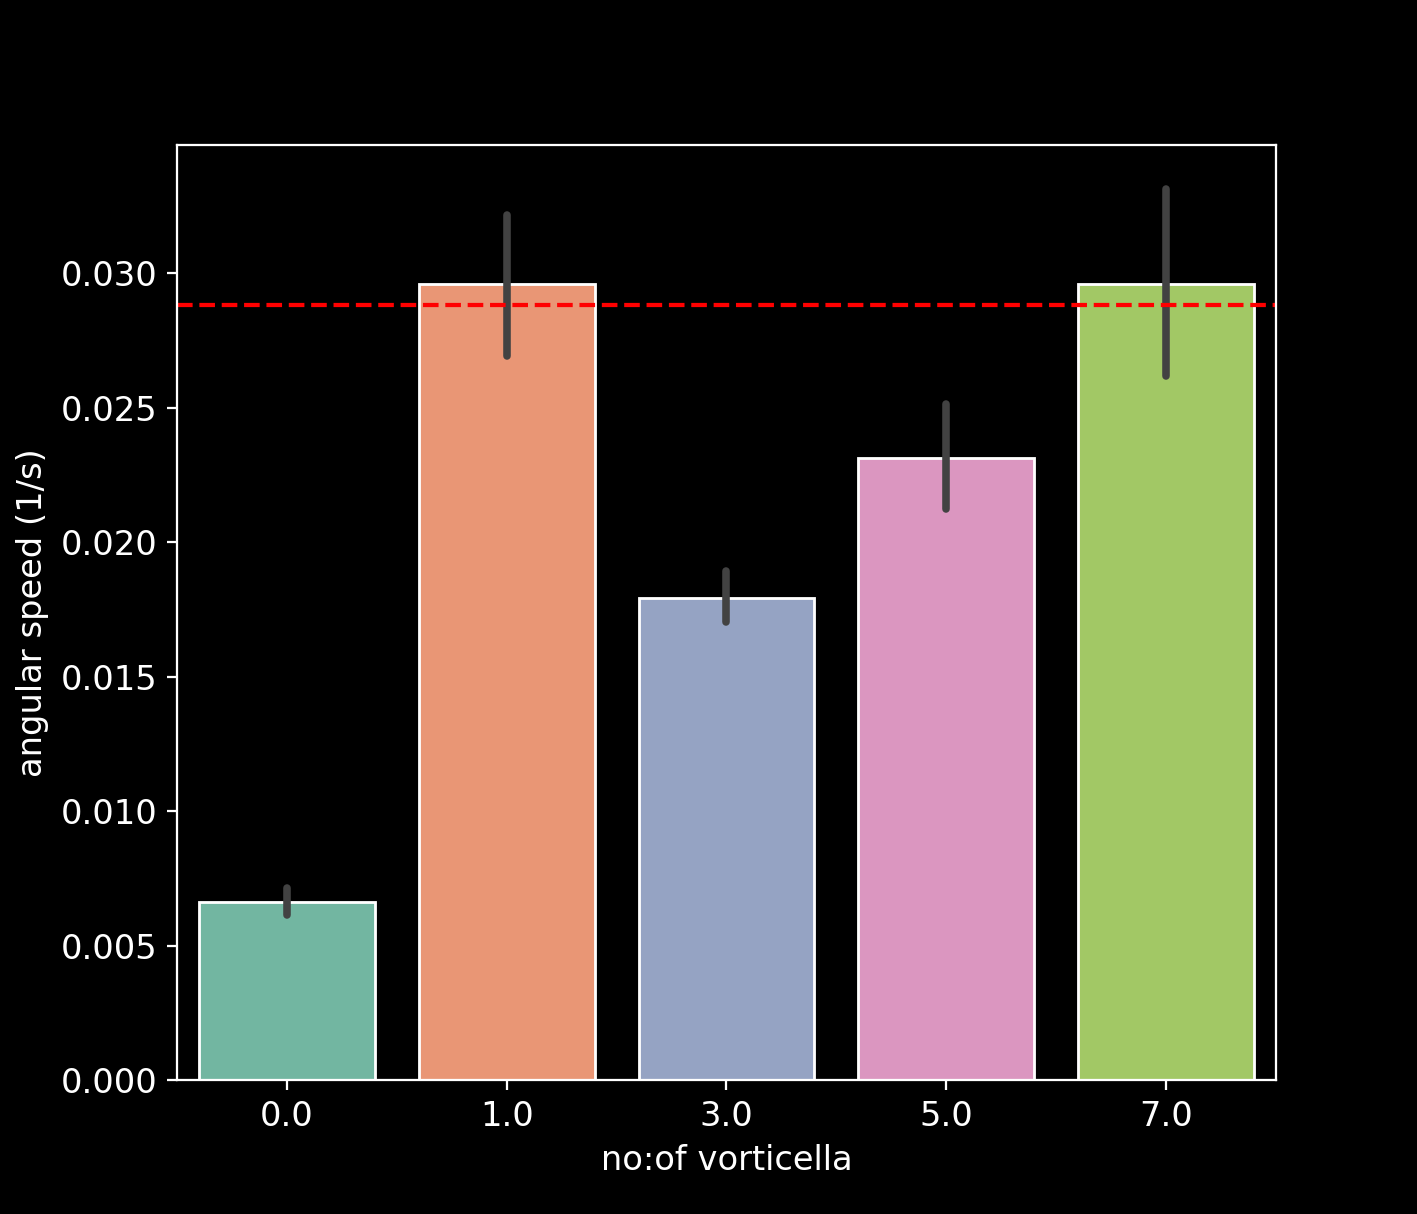

<IPython.core.display.Javascript object>


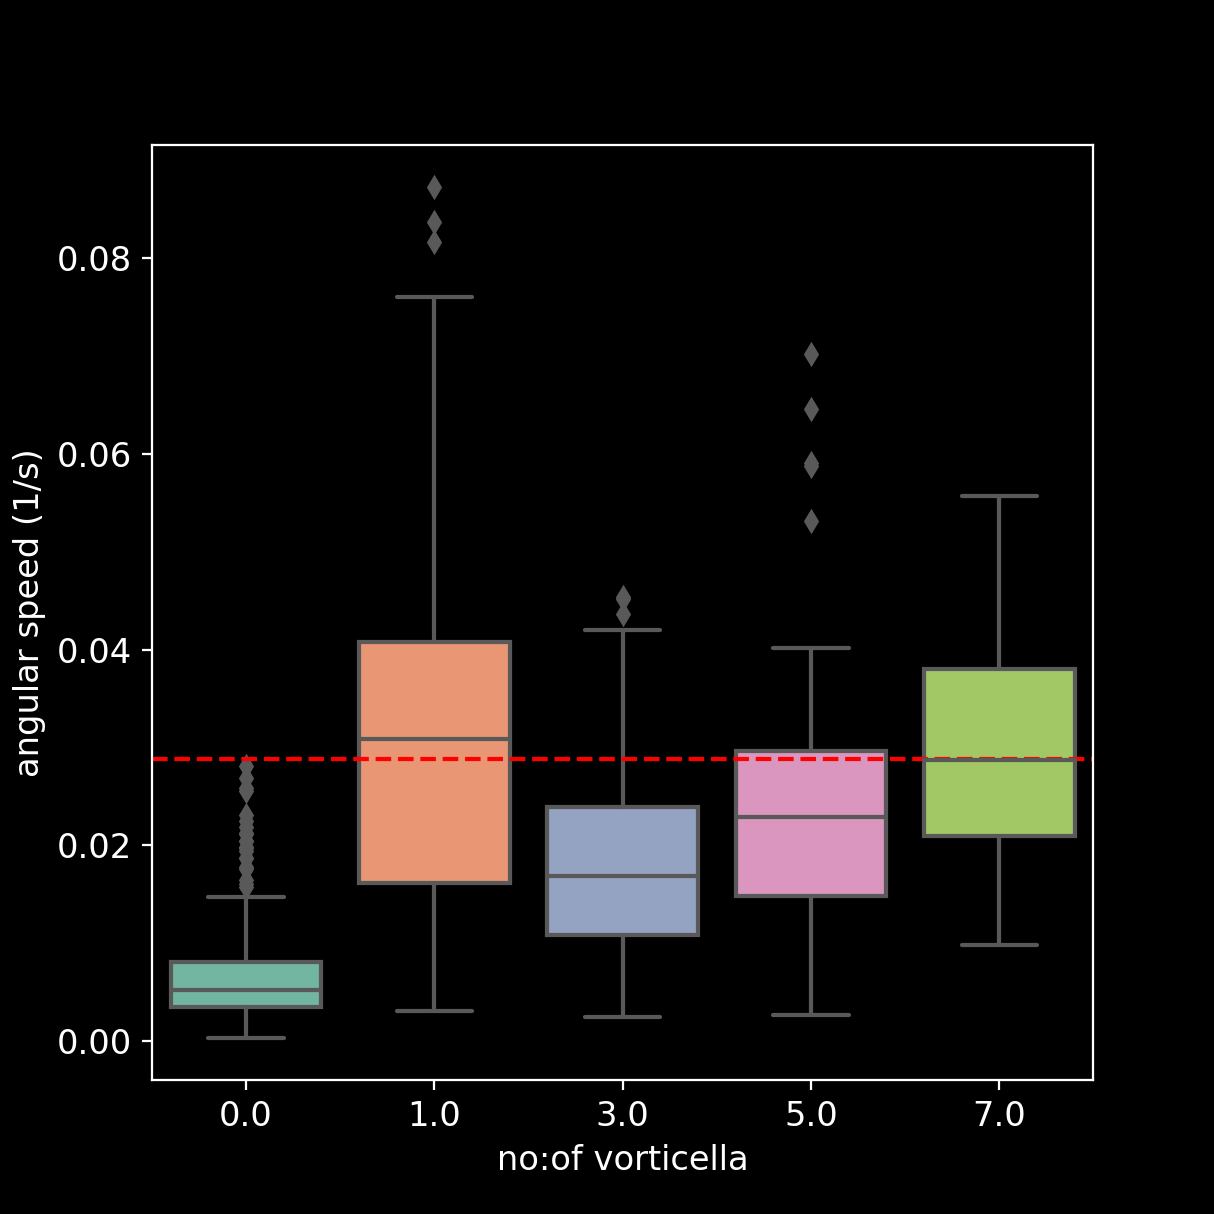

In [17]:
# # Angular speed vs no:of vorticella (Bar-plot)
plt.style.use('dark_background')
save = False

plt.figure(figsize=(7,6))
ax1 = sns.barplot(x="no:of vorticella", y="angular speed (1/s)", data=df, palette="Set2")
ax1.axhline(Omega, ls='--', color = 'r')

if(save):
    plt.savefig(os.path.join(plots_folder, 'AngularSpeed_vs_numOfVorticella_Bar'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'AngularSpeed_vs_numOfVorticella_Bar'+'.png'), dpi =300)


# Angular speed vs no:of vorticella (Box-plot)
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="no:of vorticella", y="angular speed (1/s)", data=df, palette="Set2")
ax.axhline(Omega, ls='--', color = 'r')

if(save):
    plt.savefig(os.path.join(plots_folder, 'AngularSpeed_vs_numOfVorticella_BoxPlot'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'AngularSpeed_vs_numOfVorticella_BoxPlot'+'.png'), dpi =300)

# # # Angular speed vs no:of vorticella (Violin-plot)
# plt.figure()
# ax1 = sns.violinplot(x="no:of vorticella", y="angular speed (1/s)", data=df, palette="viridis")
# ax1.axhline(Omega, ls='--', color = 'r')

# if(save):
#     plt.savefig('AngularSpeed_vs_numOfVorticella_Violin'+'.svg', dpi =300)
#     plt.savefig('AngularSpeed_vs_numOfVorticella_Violin'+'.png', dpi =300)


# Box plot: The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, 
# except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

## Plot the dimensionless rotation rate

<IPython.core.display.Javascript object>


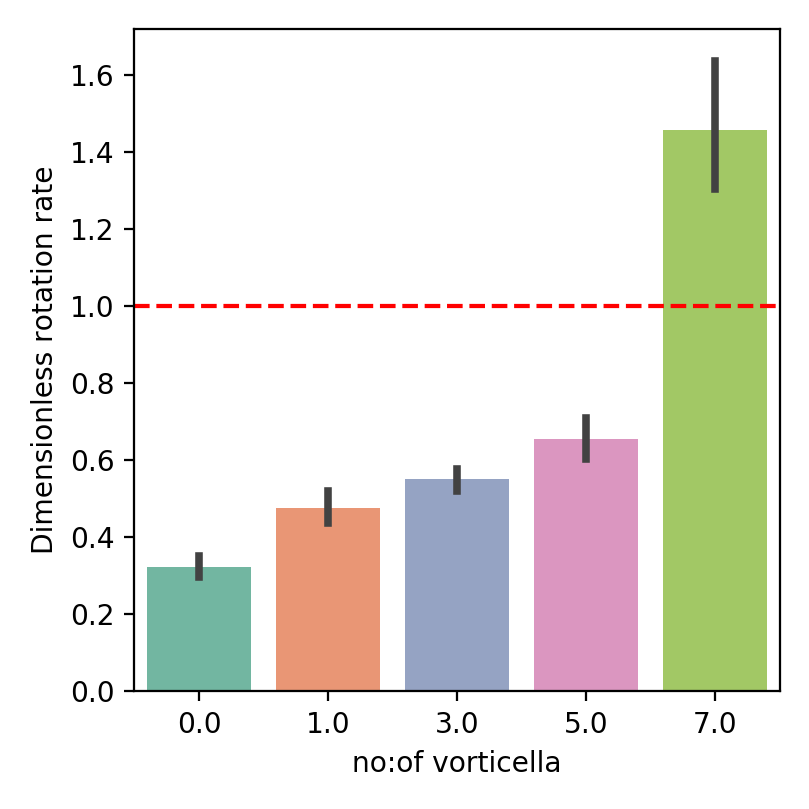

<IPython.core.display.Javascript object>


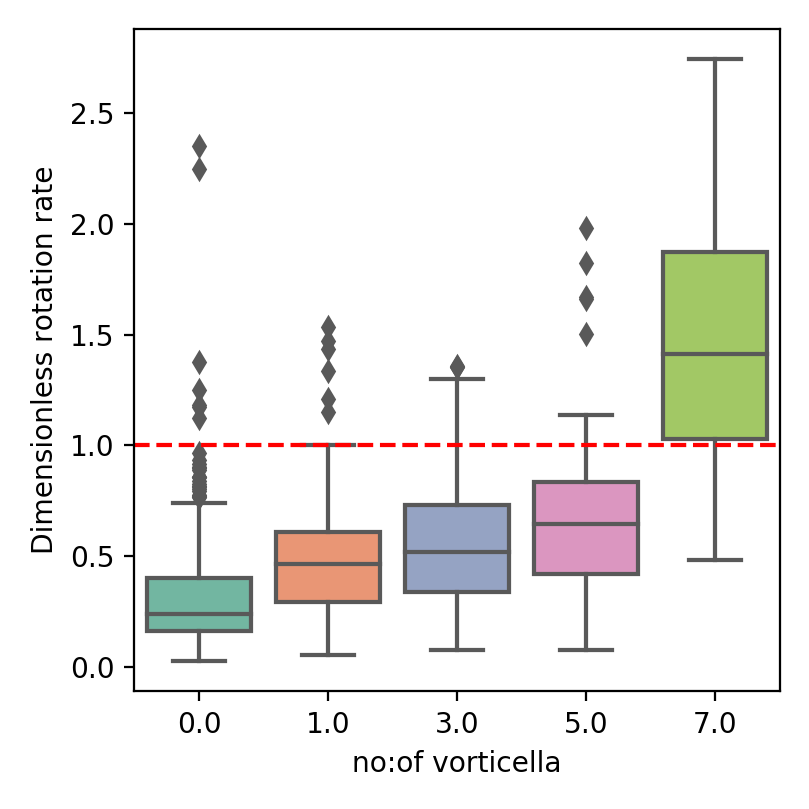

<IPython.core.display.Javascript object>


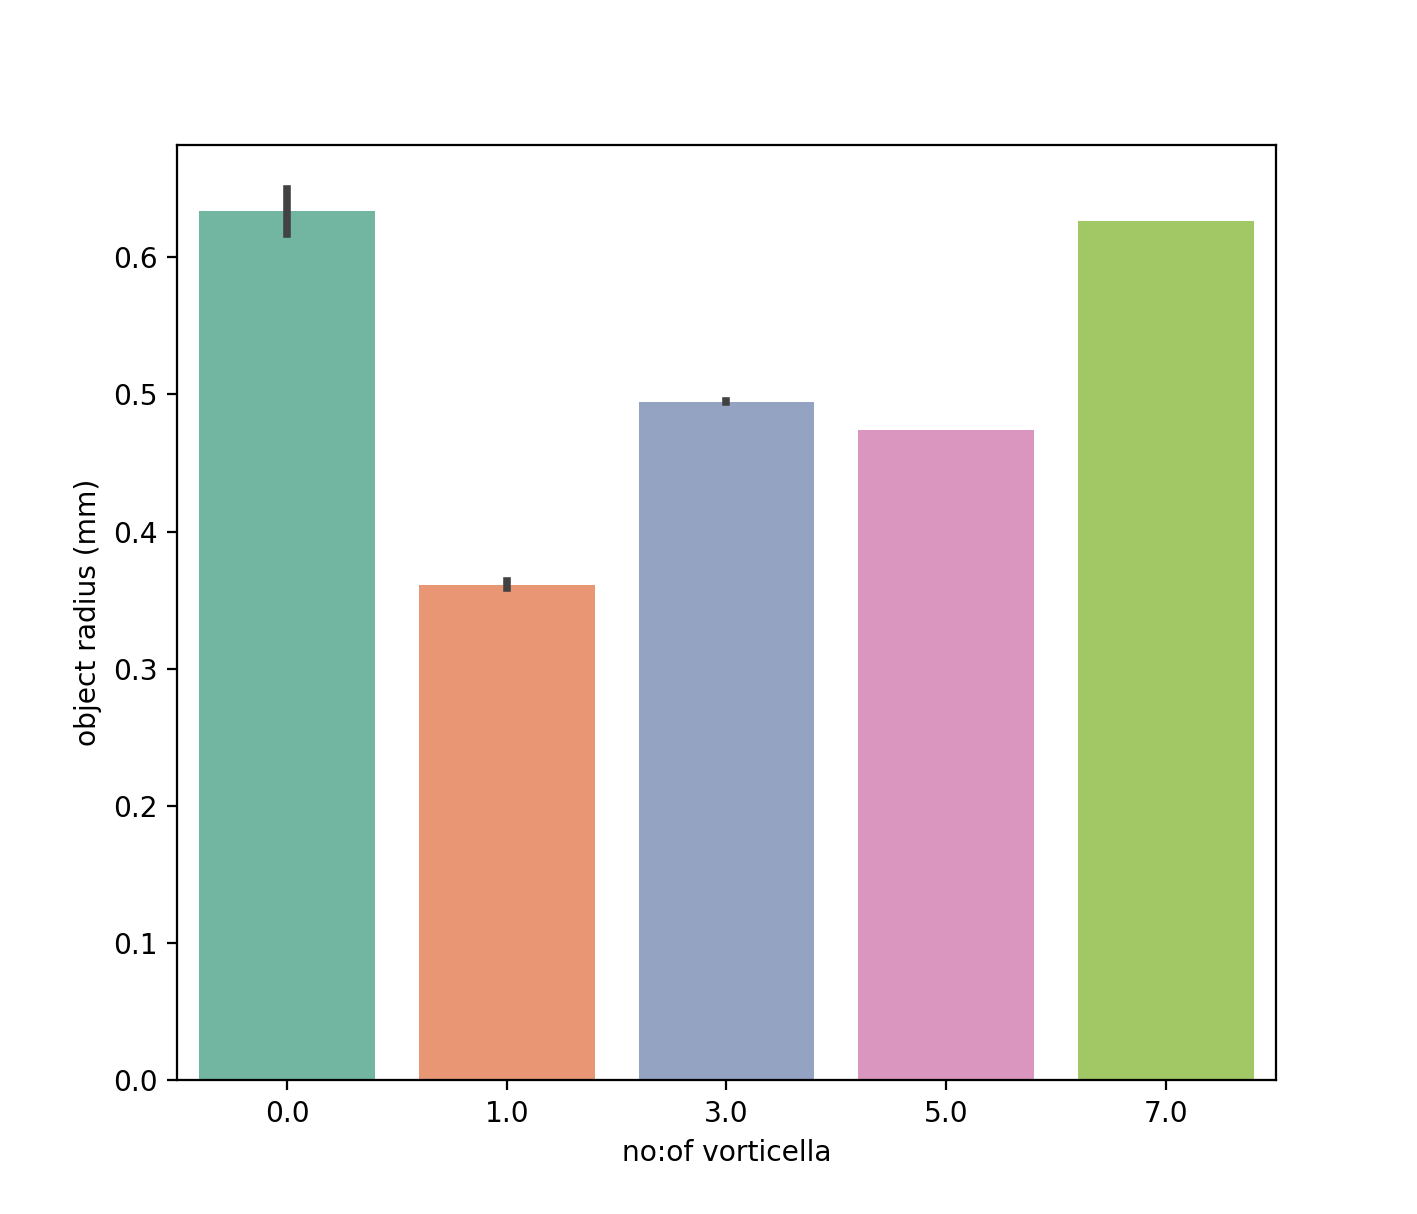

In [25]:
save = False
plt.figure(figsize=(4,4))
ax1 = sns.barplot(x="no:of vorticella", y="Dimensionless rotation rate", data=df, palette="Set2")
ax1.axhline(1, ls='--', color = 'r')
plt.tight_layout()
if(save):
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella'+'.png'), dpi =300)
plt.show()

plt.figure(figsize=(4,4))
ax1 = sns.boxplot(x="no:of vorticella", y="Dimensionless rotation rate", data=df, palette="Set2")
ax1.axhline(1, ls='--', color = 'r')
plt.tight_layout()
if(save):
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella_BoxPlot'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella_BoxPlot'+'.png'), dpi =300)
plt.show()


plt.figure(figsize=(7,6))
ax1 = sns.barplot(x="no:of vorticella", y="object radius (mm)", data=df, palette="Set2")
plt.show()


<IPython.core.display.Javascript object>


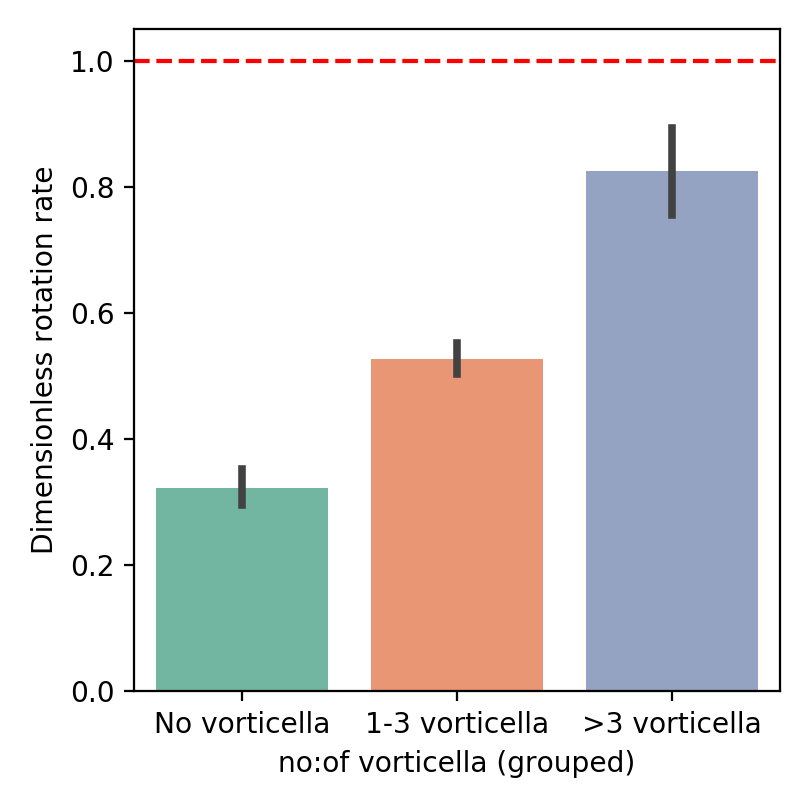

<IPython.core.display.Javascript object>


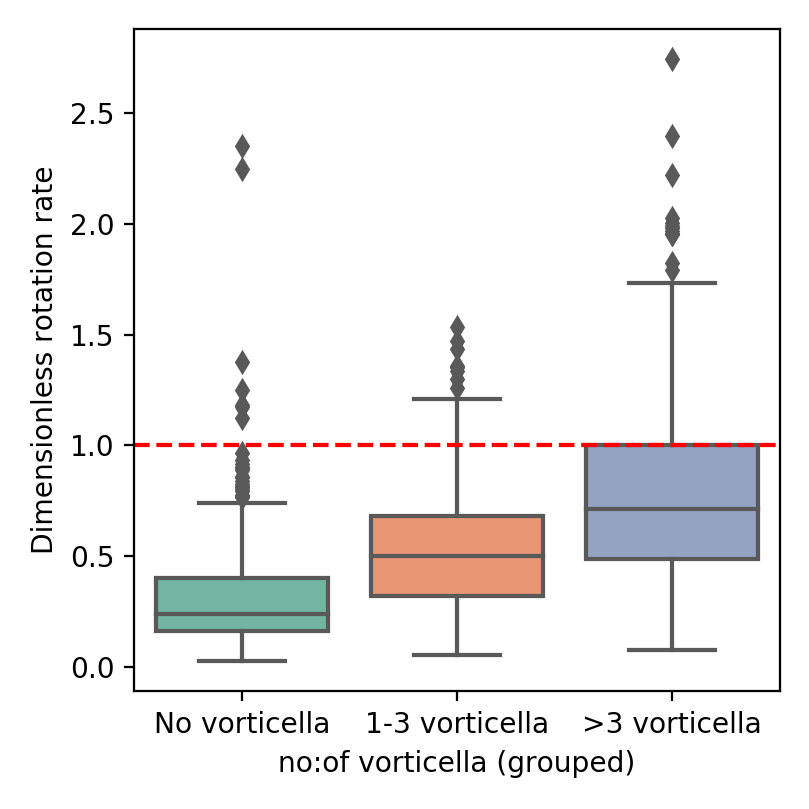

<IPython.core.display.Javascript object>


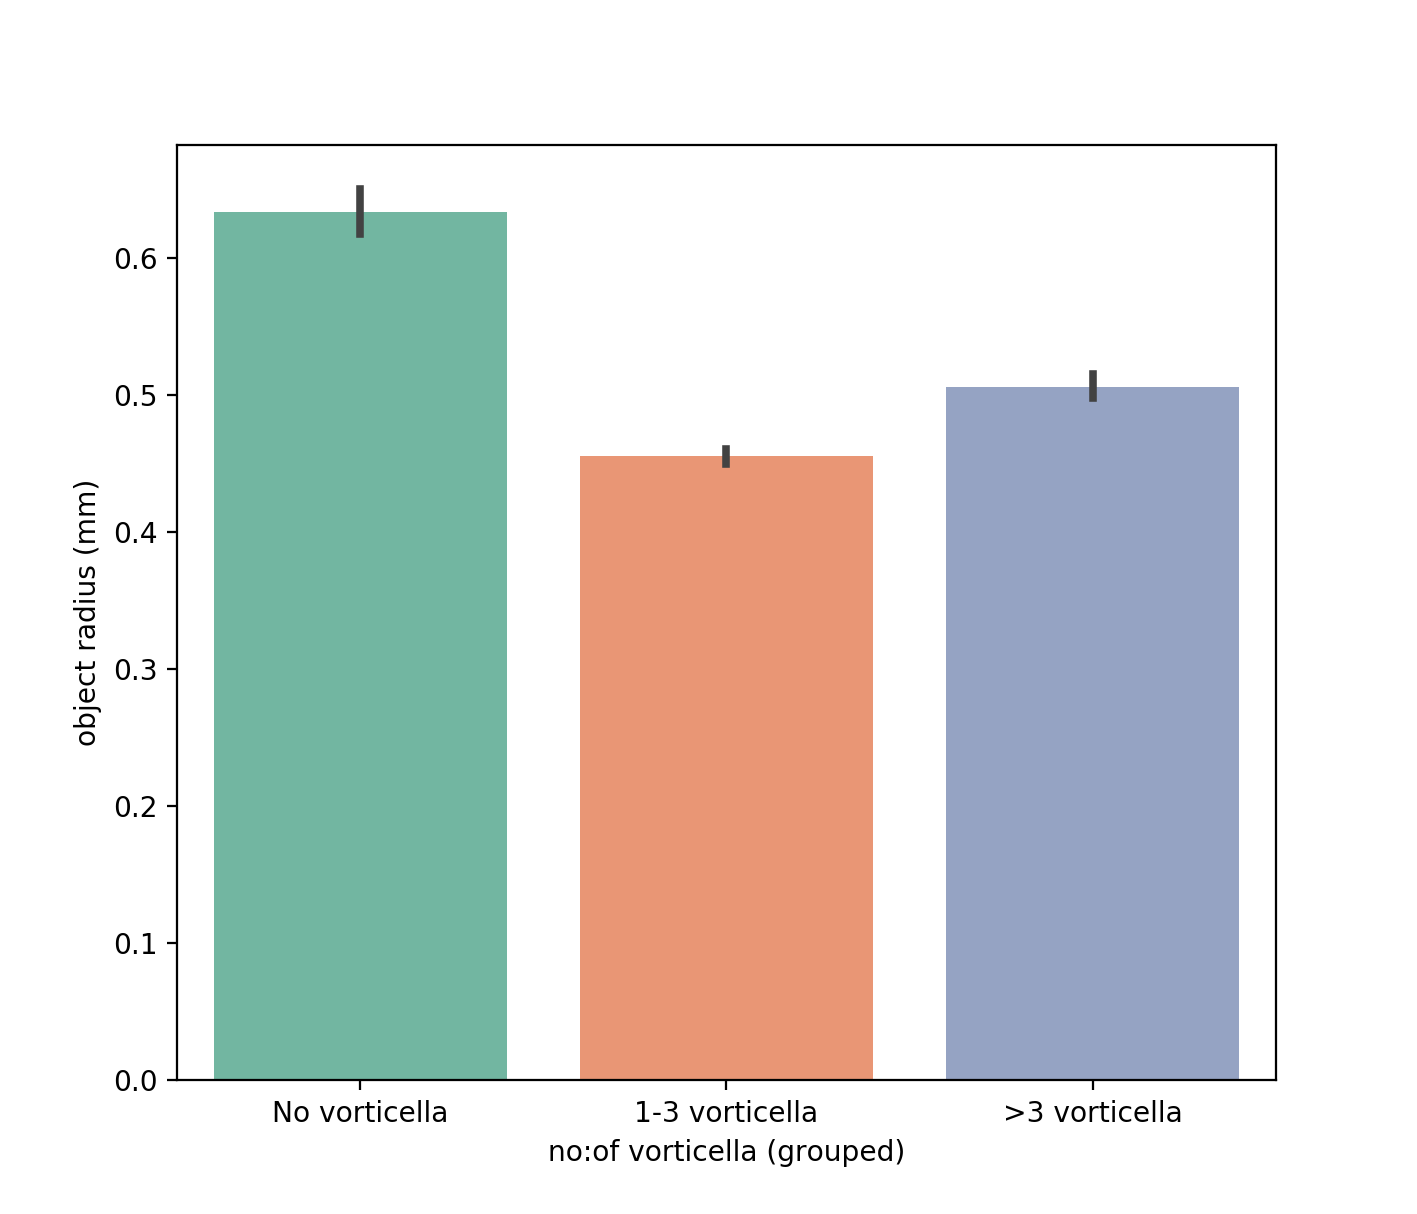

In [26]:
# # Angular speed vs no:of vorticella (grouped)
plt.style.use('default')
save = False

order = ['No vorticella', '1-3 vorticella', '>3 vorticella']

plt.figure(figsize=(4,4))
ax1 = sns.barplot(x="no:of vorticella (grouped)", y="Dimensionless rotation rate", data=df, palette="Set2", order = order)
ax1.axhline(1, ls='--', color = 'r')
plt.tight_layout()
if(save):
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella_Grouped'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella_Grouped'+'.png'), dpi =300)

plt.figure(figsize=(4,4))
ax1 = sns.boxplot(x="no:of vorticella (grouped)", y="Dimensionless rotation rate", data=df, palette="Set2", order = order)
ax1.axhline(1, ls='--', color = 'r')
plt.tight_layout()
if(save):
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella_Grouped_BoxPlot'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_vs_numOfVorticella_Grouped_BoxPlot'+'.png'), dpi =300)
    
plt.figure(figsize=(7,6))
ax1 = sns.barplot(x="no:of vorticella (grouped)", y="object radius (mm)", data=df, palette="Set2", order = order)

## Statistical tests
Check to see if the observed changes in rotation rate and axis are statistically significant. 

<IPython.core.display.Javascript object>


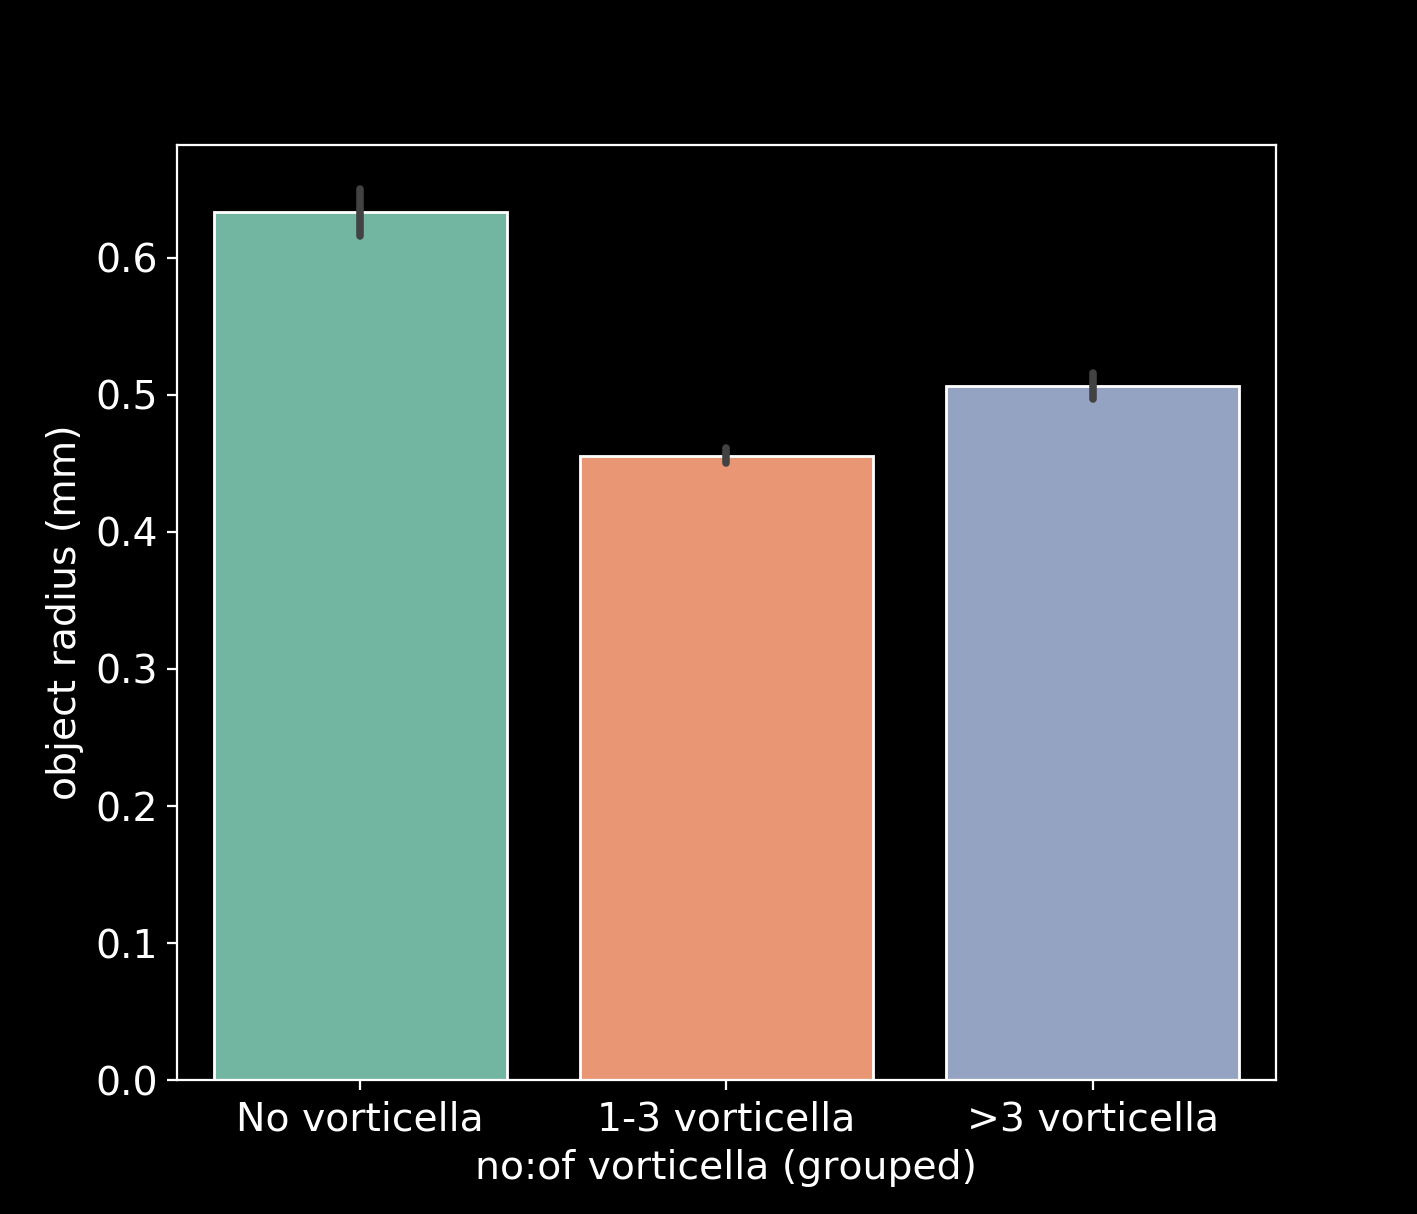

In [88]:
# See if there are correlation among other parameters
plt.figure(figsize=(7,6))
ax1 = sns.barplot(x="no:of vorticella (grouped)", y="object radius (mm)", data=df, palette="Set2", order = order)

<IPython.core.display.Javascript object>


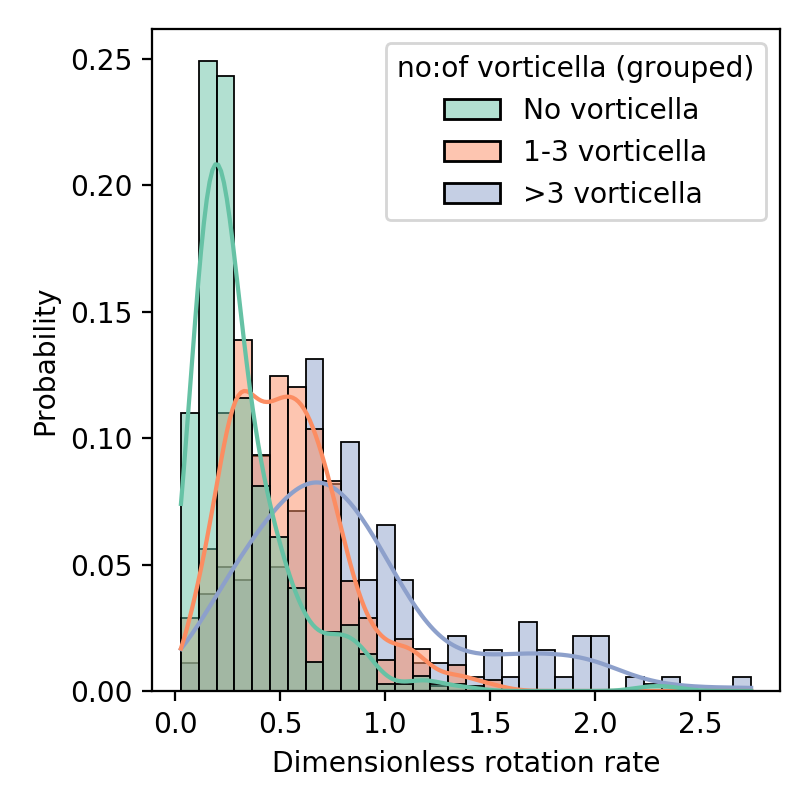

In [159]:
# Plot the distribution of rotation rates for each group
save = True
plt.figure(figsize=(4, 4))
sns.histplot(df, x="Dimensionless rotation rate", hue = "no:of vorticella (grouped)", common_norm=False, stat="probability", kde=True, palette="Set2", hue_order = order)
plt.show()
plt.tight_layout()
if(save):
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_Distribution'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'DimensionlessRotationRate_Distribution'+'.png'), dpi =300)

    Note: We can see that the distributions have different shapes, so we can only interpret the Kruskal-Wallis H test in terms of means and not medians.

<IPython.core.display.Javascript object>


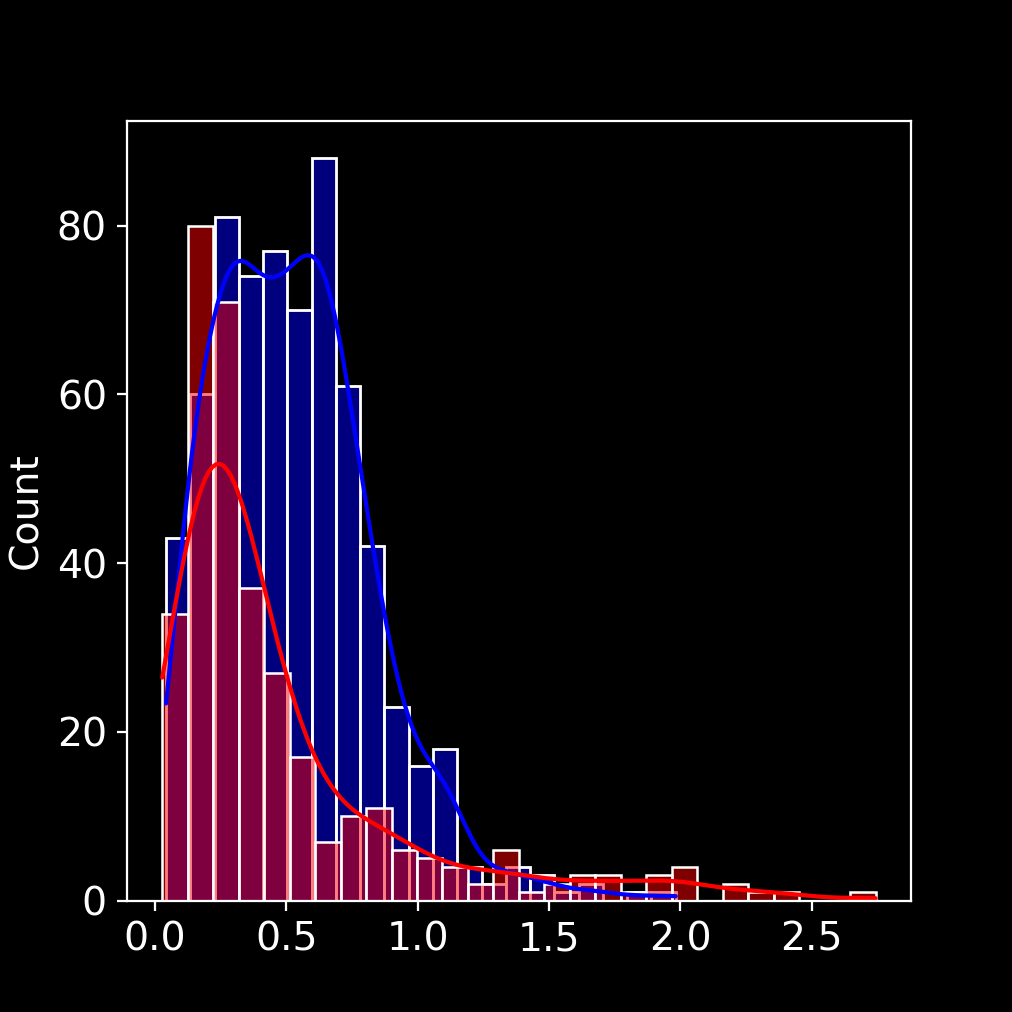

In [112]:
# Divide the data into groups based on the aggregate size
sample_size_small = np.array(df['Dimensionless rotation rate'][df["object radius (mm)"]<= np.mean(df["object radius (mm)"])])
sample_size_large = np.array(df['Dimensionless rotation rate'][df["object radius (mm)"]> np.mean(df["object radius (mm)"])])

plt.figure()
sns.histplot(sample_size_small, kde = True, color = 'b')
sns.histplot(sample_size_large, kde = True, color = 'r')
plt.show()

In [113]:
# Kruskal-Wallis test for the two samples based on the aggregate size
stats.kruskal(sample_size_small, sample_size_large)


KruskalResult(statistic=46.026308903370136, pvalue=1.1667557499466865e-11)

In [178]:
# Perform statistical test of whether the rotation rate distributions are statistically different. We also test to see if the means/medians are Statistically different.
# Treat the mean rotation rate for each track as one data point. 
from scipy import stats

sample_vorticella_0 = np.array(df['Dimensionless rotation rate'][df['no:of vorticella (grouped)'] == 'No vorticella'])
sample_vorticella_1_3 = np.array(df['Dimensionless rotation rate'][df['no:of vorticella (grouped)'] == '1-3 vorticella'])
sample_vorticella_3_higher = np.array(df['Dimensionless rotation rate'][df['no:of vorticella (grouped)'] == '>3 vorticella'])


s, p = stats.kruskal(sample_vorticella_0, sample_vorticella_1_3,sample_vorticella_3_higher)
print('Kruskal-Wallis test statistic: {}, p-value: {}'.format(s, p))

Kruskal-Wallis test statistic: 257.5537331839737, p-value: 1.1828166855029655e-56


### Komogorov-Smirnov 2-sample test to compare distributions

In [100]:
# Kolmogorov Smirnov test for comparing distributions:
s1, p1 = stats.ks_2samp(sample_vorticella_0, sample_vorticella_1_3)
s2, p2 = stats.ks_2samp(sample_vorticella_0, sample_vorticella_3_higher)
s3, p3 = stats.ks_2samp(sample_vorticella_1_3, sample_vorticella_3_higher)

print('KS 2-sample test statistic {}, p-value {}'.format(s1, p1))
print('KS 2-sample test statistic {}, p-value {}'.format(s2, p2))
print('KS 2-sample test statistic {}, p-value {}'.format(s3, p3))

KS 2-sample test statistic 0.4210295267304107, p-value 3.3306690738754696e-16
KS 2-sample test statistic 0.5950106913756237, p-value 3.3922005230246904e-37
KS 2-sample test statistic 0.3224723941681972, p-value 9.892087149410145e-13


### Permutation test to see if the no:of Vorticella is a good estimator of the rotation rate of the aggregate?


In [101]:
def run_permutation_test(pooled, size_A,size_B,delta):
    np.random.shuffle(pooled)
    star_A = pooled[:size_A]
    star_B = pooled[-size_B:]
    return abs(star_A.mean() - star_B.mean())

<IPython.core.display.Javascript object>


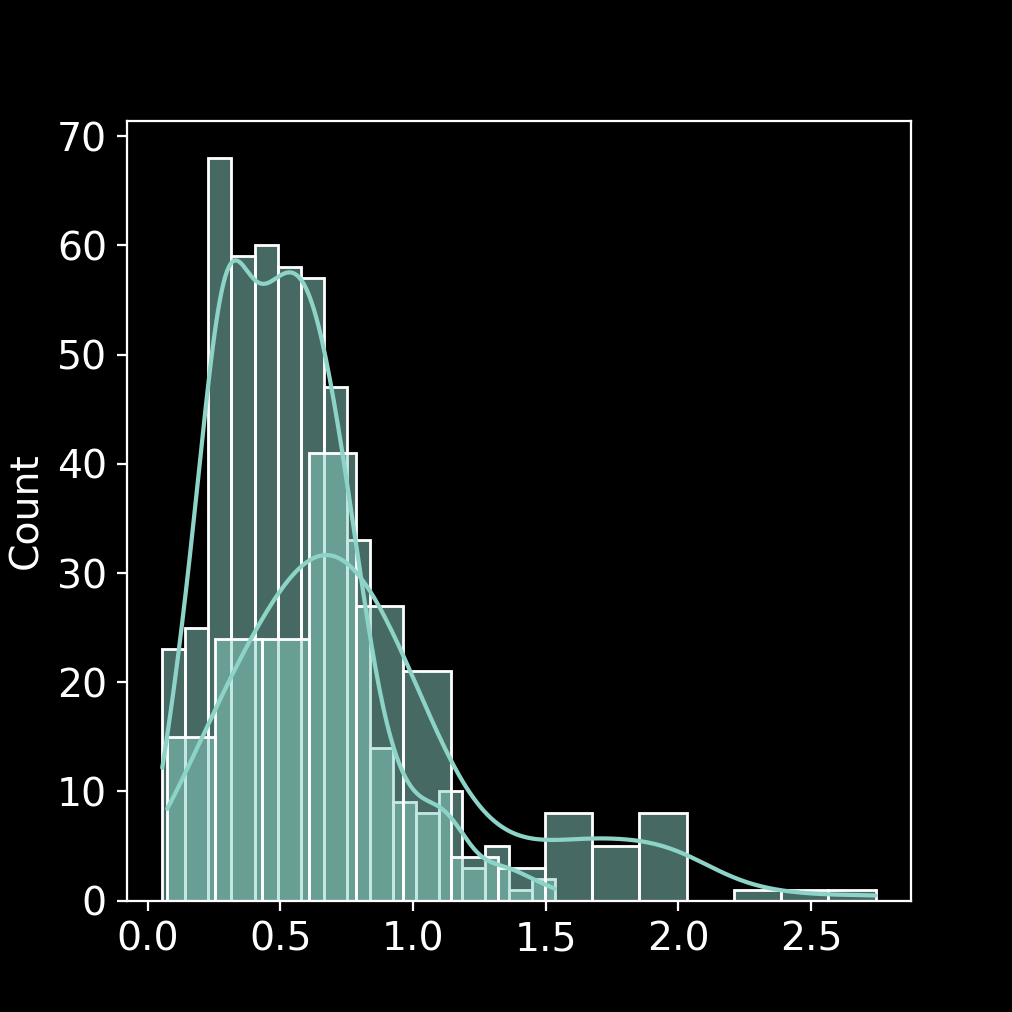

In [107]:
# Choose data for the permutation test

# Test the permutation method
# sample_1 = np.array([94,197,16,38,99,141,23])
# sample_2 = np.array([52,104,146,10,51,30,40,27,46])

# mu1= 10.0
# mu2= 10.1
# sigma1= 1
# sigma2 = 2
# sample_1 = sigma1*np.random.randn(1000) + mu1
# sample_2 = sigma2*np.random.randn(1100) + mu2

sample_1 = sample_vorticella_1_3
sample_2 = sample_vorticella_3_higher

plt.figure()
sns.histplot(sample_1, kde = True)
sns.histplot(sample_2, kde = True)
plt.show()



In [109]:
# Run the permutation test

delta = sample_1.mean() - sample_2.mean()
print('Difference in the means: {}'.format(delta))

pooled = np.hstack([sample_1, sample_2]) # Pool all the data together

numSamples = 10000 # No:of permutations to try
estimates = np.fromiter(map(lambda x: run_permutation_test(pooled, sample_1.size, sample_2.size, delta), range(numSamples)), dtype = np.float)

print(estimates)
# Find instances where the difference in the mean was less than in the original grouping. 
# Larger this value, the better our estimator is.

diffCount = len(np.where(estimates <= abs(delta))[0])  

print(diffCount)

# Smaller values indicate that the original grouping is a good estimator. 
hat_asl_perm = 1.0 - (float(diffCount)/float(numSamples))
print(hat_asl_perm)

Difference in the means: -0.29743998968350094
[0.00716186 0.00671019 0.04014834 ... 0.00074588 0.01441439 0.00236931]
10000
0.0


In [179]:
# Find the mean and sd of rotation rate for each group
groups = ['No vorticella', '1-3 vorticella', '>3 vorticella']

for group in groups:
    print(group)
    mean = np.nanmean(np.array(df['Dimensionless rotation rate'][df['no:of vorticella (grouped)'] == group]))
    sd =  np.nanstd(np.array(df['Dimensionless rotation rate'][df['no:of vorticella (grouped)'] == group]))
    
    print('{}: mean +- sd:{} +- {}'.format(group, mean, sd))

No vorticella
No vorticella: mean +- sd:0.3217563660112877 +- 0.2715044421284208
1-3 vorticella
1-3 vorticella: mean +- sd:0.5275210927662534 +- 0.27143299991773734
>3 vorticella
>3 vorticella: mean +- sd:0.8249610824497543 +- 0.5002256863727195


<IPython.core.display.Javascript object>


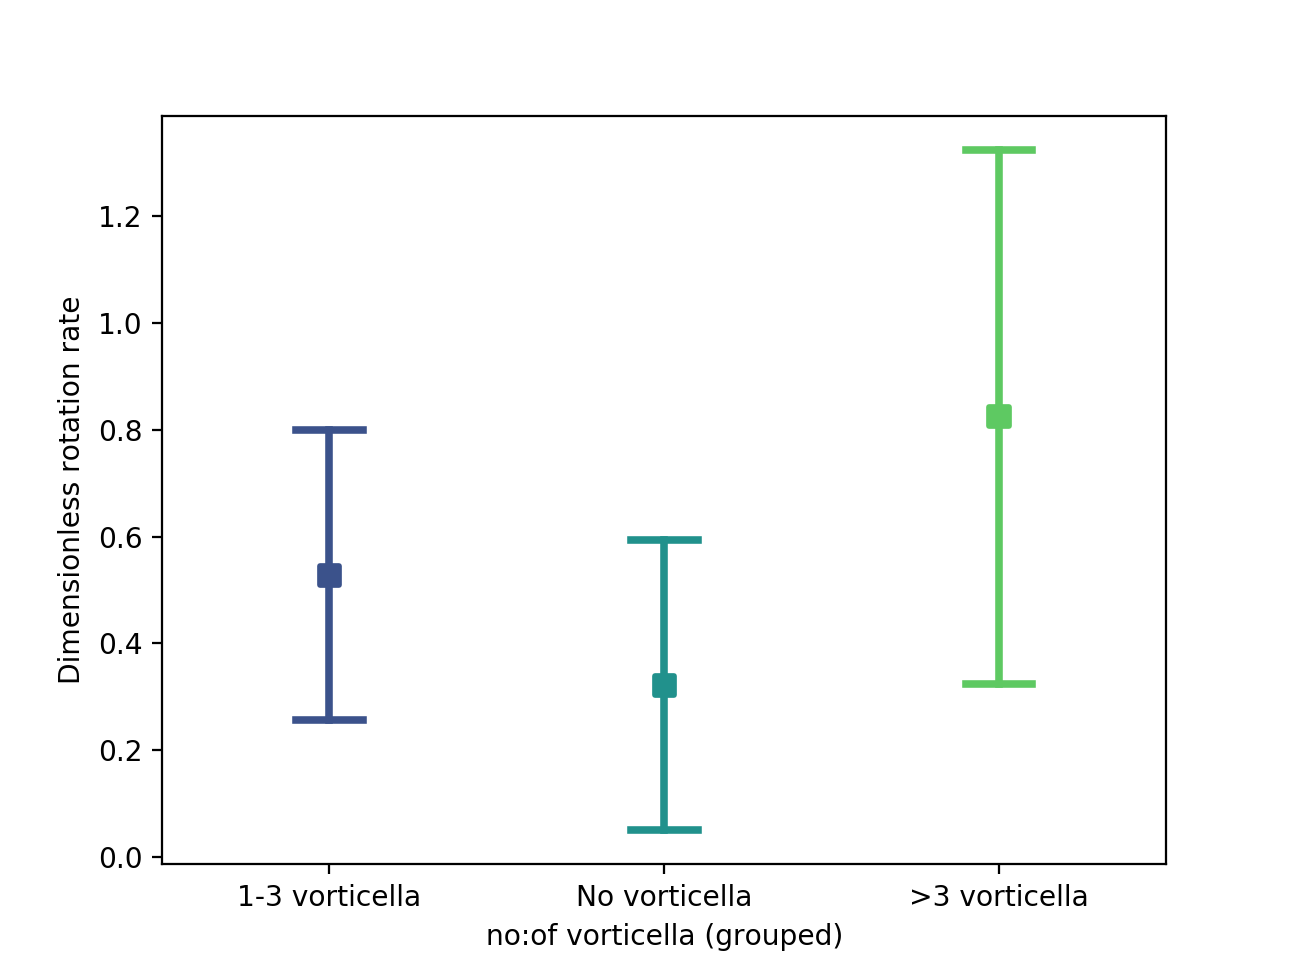

In [181]:
# # Angular speed vs no:of vorticella (Scatter plot)
save = False
plt.figure()
ax1 = sns.pointplot(x="no:of vorticella (grouped)", y="Dimensionless rotation rate", data=df, palette="viridis", capsize=0.2, markers='s', ci = "sd")
if(save):
    plt.savefig(os.path.join(plots_folder,'AngularSpeed_vs_numOfVorticella_ScatterPlot'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder,'AngularSpeed_vs_numOfVorticella_ScatterPlot'+'.png'), dpi =300)

# Distribution of rotation rate and orientation

<IPython.core.display.Javascript object>


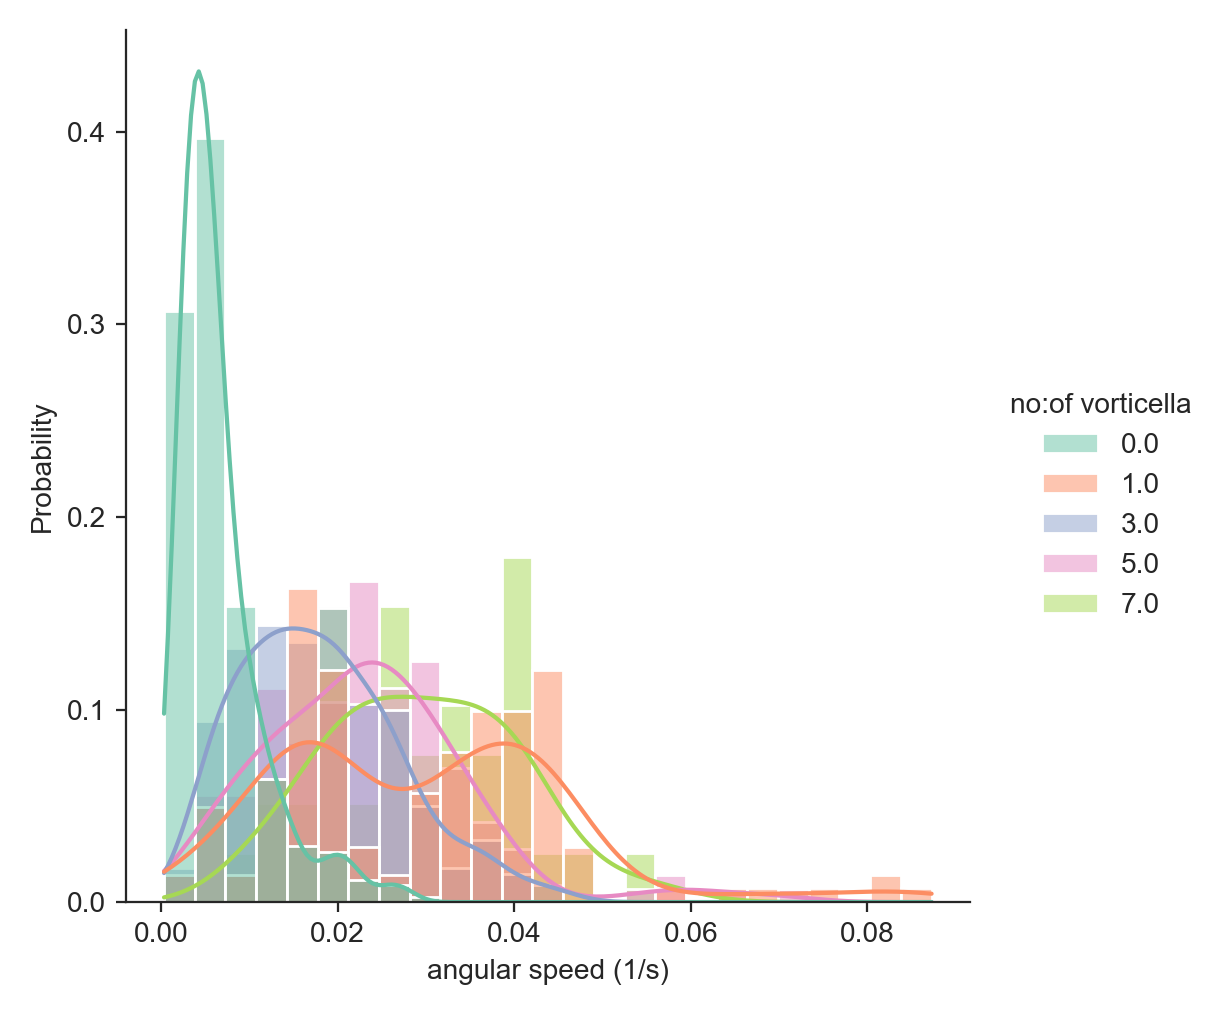

In [16]:
sns.displot(df, x="angular speed (1/s)", hue = "no:of vorticella", common_norm=False, stat="probability", kde=True, palette="Set2")


In [21]:
from scipy.stats import ttest_ind

dist_1 = df.loc[df['no:of vorticella']==0.0, 'angular speed (1/s)']
dist_2 = df.loc[df['no:of vorticella']==7.0, 'angular speed (1/s)']
res = ttest_ind(dist_1, dist_2, equal_var = False)

print(res)

Ttest_indResult(statistic=-13.352375827083033, pvalue=2.783164173591493e-16)


In [ ]:
# Plot the orientation distribution of the angular velocity orientation

['H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track8/track000.csv', 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track9/track000.csv', 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track7/track000.csv']


<IPython.core.display.Javascript object>


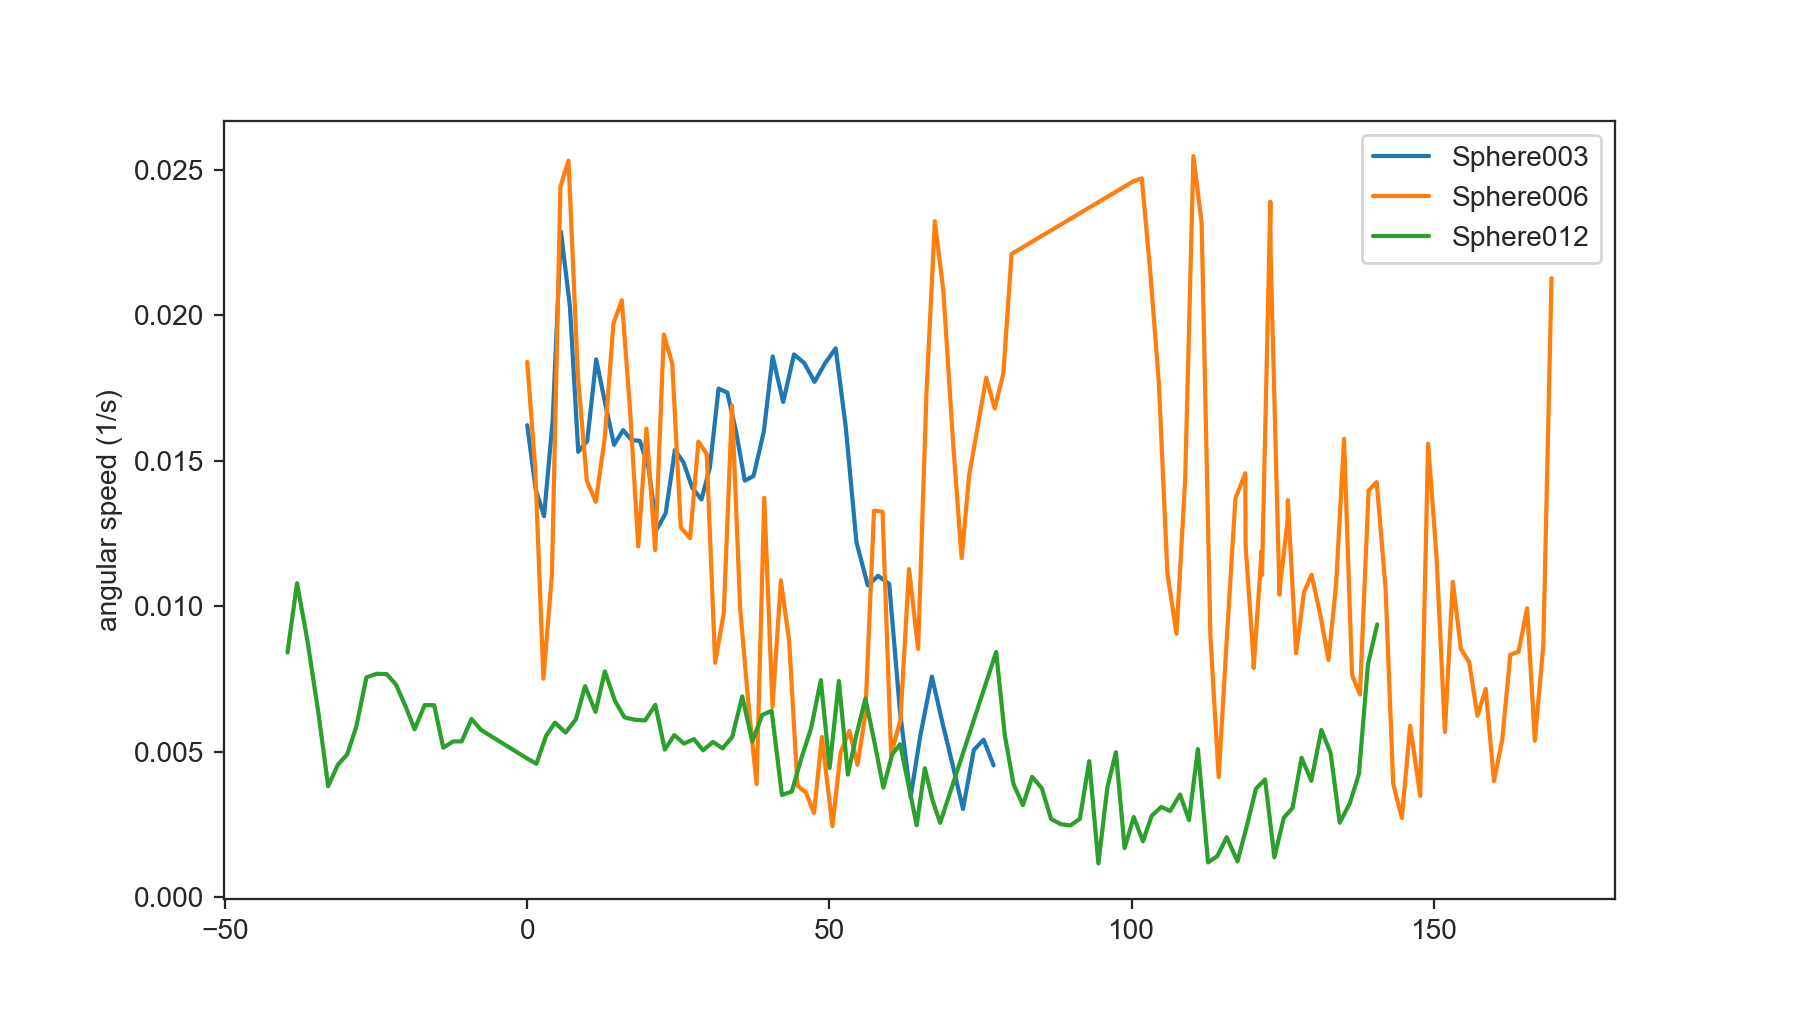

Sphere003
[ 0.    1.41  2.78  4.21  5.58  7.07  8.44  9.93 11.41 12.89 14.36 15.86
 17.25 18.63 20.05 21.44 22.9  24.43 25.85 27.3  28.82 30.21 31.65 33.1
 34.57 35.99 37.44 39.14 40.6  42.34 44.13 45.83 47.53 49.23 51.02 52.68
 54.46 56.34 58.04 59.88 61.66 63.42 65.   66.94 68.7  70.41 72.08 73.88
 75.5  77.15]
Sphere006
[  0.     1.33   2.68   4.09   5.49   6.83   8.38   9.87  11.35  12.85
  14.26  15.65  17.    18.37  19.72  21.17  22.6   23.99  25.4   26.94
  28.32  29.69  31.08  32.51  33.88  35.22  36.57  37.94  39.21  40.57
  41.96  43.32  44.7   46.1   47.44  48.74  50.49  51.84  53.29  54.63
  55.93  57.37  58.78  60.19  61.73  63.16  64.66  66.05  67.43  68.84
  70.46  71.86  73.1   74.47  75.93  77.33  78.77  80.12 100.28 101.66
 103.08 104.49 105.9  107.4  108.84 110.2  111.56 113.01 114.38 115.79
 117.15 118.78 120.11 121.48 122.93 124.44 125.78 118.84 120.17 121.54
 122.97 124.49 125.82 127.19 128.49 129.75 131.19 132.55 133.8  135.12
 136.44 137.75 139.18 140.52 141.99 

In [131]:
# Plot time series by stitching together data that belongs to the same track.
# track_name_1 = 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track10/track000.csv'

track_list = df['track file'].unique()

track_list = ['H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track8/track000.csv', 
              'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track9/track000.csv',
             'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track7/track000.csv']
print(track_list)

plt.figure()
for track_name in track_list:
    track_ID = np.array(df.loc[df['track file']==track_name, 'track ID'])
    print(track_ID[0])
    time_array = np.array(df.loc[df['track file']==track_name, 'Time (s)'])
    time_array = time_array - time_array[0]
    print(time_array)
    sns.lineplot(x = time_array, y = df.loc[df['track file']==track_name, 'angular speed (1/s)'], label = track_ID[0]) 

plt.legend()
plt.show()

# Angular velocity orientation

In [142]:

# Convert from cartesian to spherical coordinates for the velocity orientation
df['p_x'] = df['angular velocity x']/df['angular speed (1/s)']
df['p_y'] = df['angular velocity y']/df['angular speed (1/s)']
df['p_z'] = df['angular velocity z']/df['angular speed (1/s)']

df['p_theta'] = np.arctan2((df['p_x']**2+df['p_y']**2)**(1/2), abs(df['p_z']))
df['p_phi'] = np.arctan2(df['p_y'], df['p_x'])



<IPython.core.display.Javascript object>


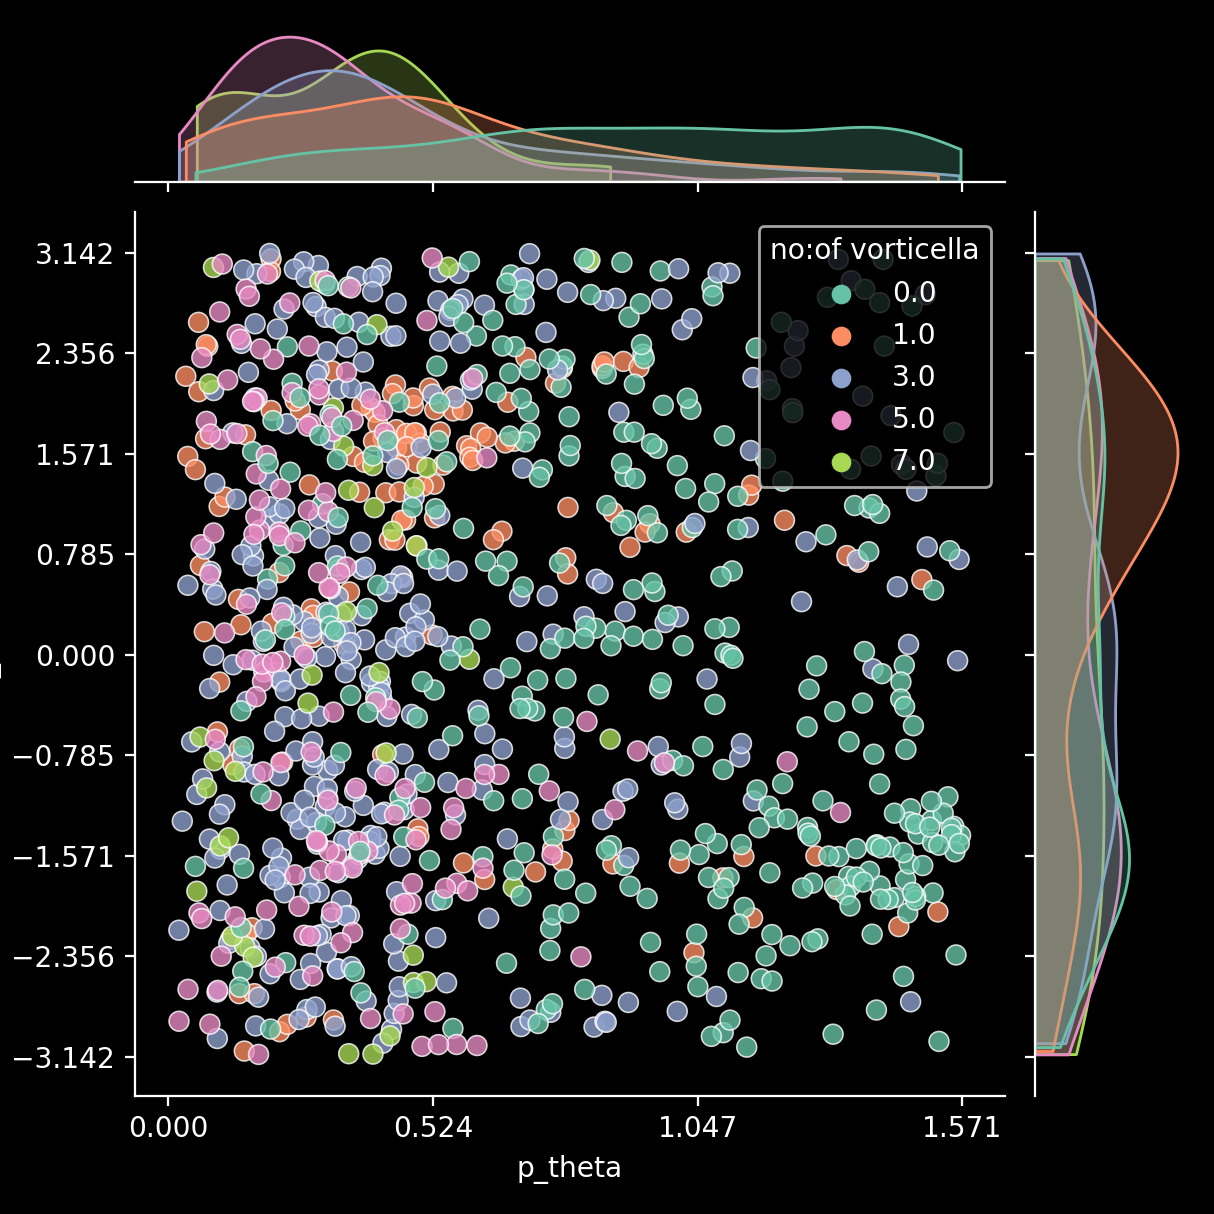

In [143]:
# JointGrid (KDE)
plt.style.use('dark_background')
save = False
g = sns.JointGrid(data = df, x="p_theta", y="p_phi", hue = "no:of vorticella", palette="Set2")
sns.scatterplot(x="p_theta", y="p_phi", hue = "no:of vorticella", palette="Set2", s= 50, alpha =0.8, ax = g.ax_joint, data = df)
sns.kdeplot(x="p_theta", hue = "no:of vorticella", palette="Set2", common_norm = False, ax = g.ax_marg_x, data = df, fill = True, legend = False, cut = 0)

sns.kdeplot(y="p_phi", hue = "no:of vorticella", palette="Set2", common_norm = False, ax = g.ax_marg_y, data = df, fill = True,legend = False, cut = 0)
x_ticks = [0, np.pi/6, 2*np.pi/6, 3*np.pi/6]
g.ax_marg_x.set_xticks(x_ticks)

y_ticks = [-np.pi, -3*np.pi/4, -2*np.pi/4, -1*np.pi/4, 0, np.pi, 3*np.pi/4, 2*np.pi/4, 1*np.pi/4]
g.ax_marg_y.set_yticks(y_ticks)
if(save):
    plt.savefig(os.path.join(plots_folder,'p_phi_vs_p_theta_joint_dist_kde'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder,'p_phi_vs_p_theta_joint_dist_kde'+'.png'), dpi =300)

<IPython.core.display.Javascript object>


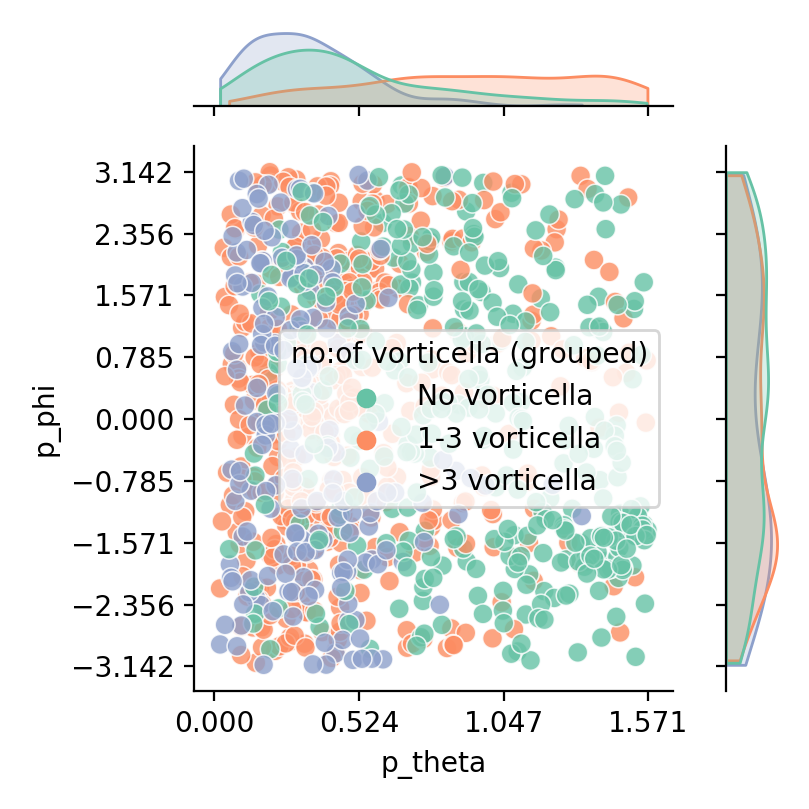

In [150]:
# Distribution of rotation axes (grouped by Vorticella number)
plt.style.use('default')
save = True
g = sns.JointGrid(data = df, x="p_theta", y="p_phi", hue = "no:of vorticella (grouped)", palette="Set2", height = 4)
sns.scatterplot(x="p_theta", y="p_phi", hue = "no:of vorticella (grouped)", palette="Set2", s= 50, alpha =0.8, ax = g.ax_joint, data = df, hue_order = order)
sns.kdeplot(x="p_theta", hue = "no:of vorticella (grouped)", palette="Set2", common_norm = False, ax = g.ax_marg_x, data = df, fill = True, legend = False, cut = 0)

sns.kdeplot(y="p_phi", hue = "no:of vorticella (grouped)", palette="Set2", common_norm = False, ax = g.ax_marg_y, data = df, fill = True,legend = False, cut = 0)
x_ticks = [0, np.pi/6, 2*np.pi/6, 3*np.pi/6]
g.ax_marg_x.set_xticks(x_ticks)

y_ticks = [-np.pi, -3*np.pi/4, -2*np.pi/4, -1*np.pi/4, 0, np.pi, 3*np.pi/4, 2*np.pi/4, 1*np.pi/4]
g.ax_marg_y.set_yticks(y_ticks)
plt.tight_layout()
if(save):
    plt.savefig(os.path.join(plots_folder,'p_phi_vs_p_theta_joint_dist_kde_grouped'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder,'p_phi_vs_p_theta_joint_dist_kde_grouped'+'.png'), dpi =300)

<IPython.core.display.Javascript object>


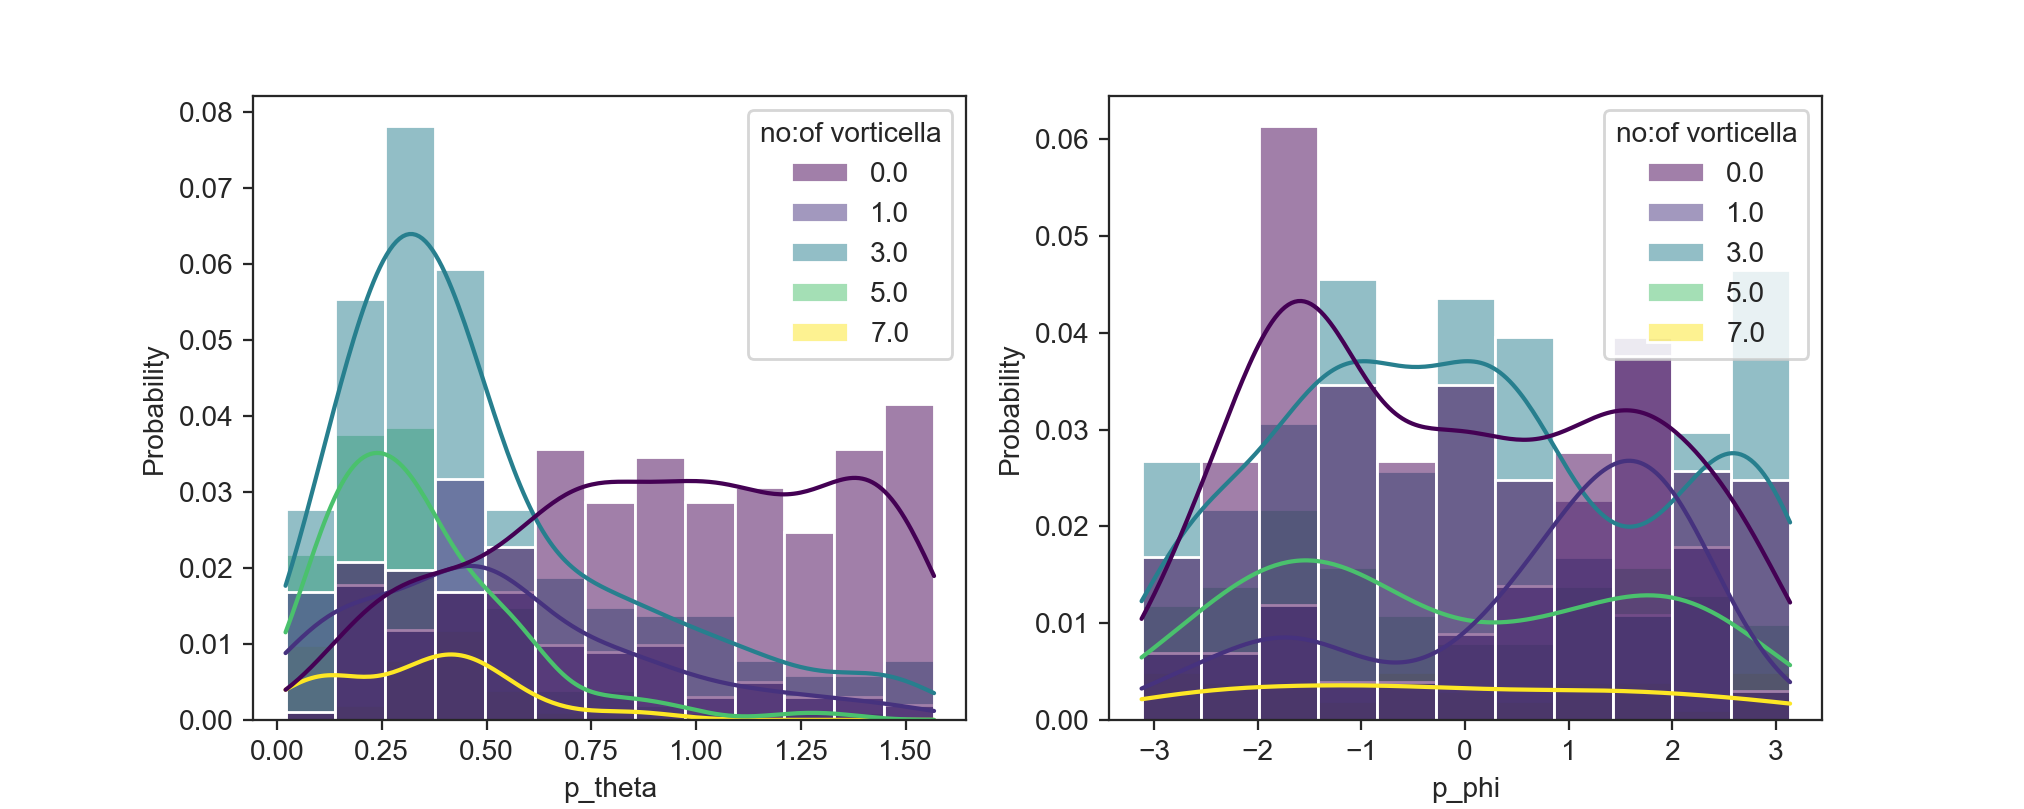

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols = 2, figsize = (10,4))
sns.histplot(df, x = 'p_theta', hue = "no:of vorticella", stat = "probability", kde = True, palette="viridis", ax = ax1)
sns.histplot(df, x = 'p_phi', hue = "no:of vorticella", stat = "probability", kde = True, palette="viridis", ax = ax2)

if(save):
    plt.savefig('Angular velocity orientation component_spherical' + '.png', dpi = 300)
    plt.savefig('Angular velocity orientation component_spherical' + '.svg', dpi = 300)


<IPython.core.display.Javascript object>


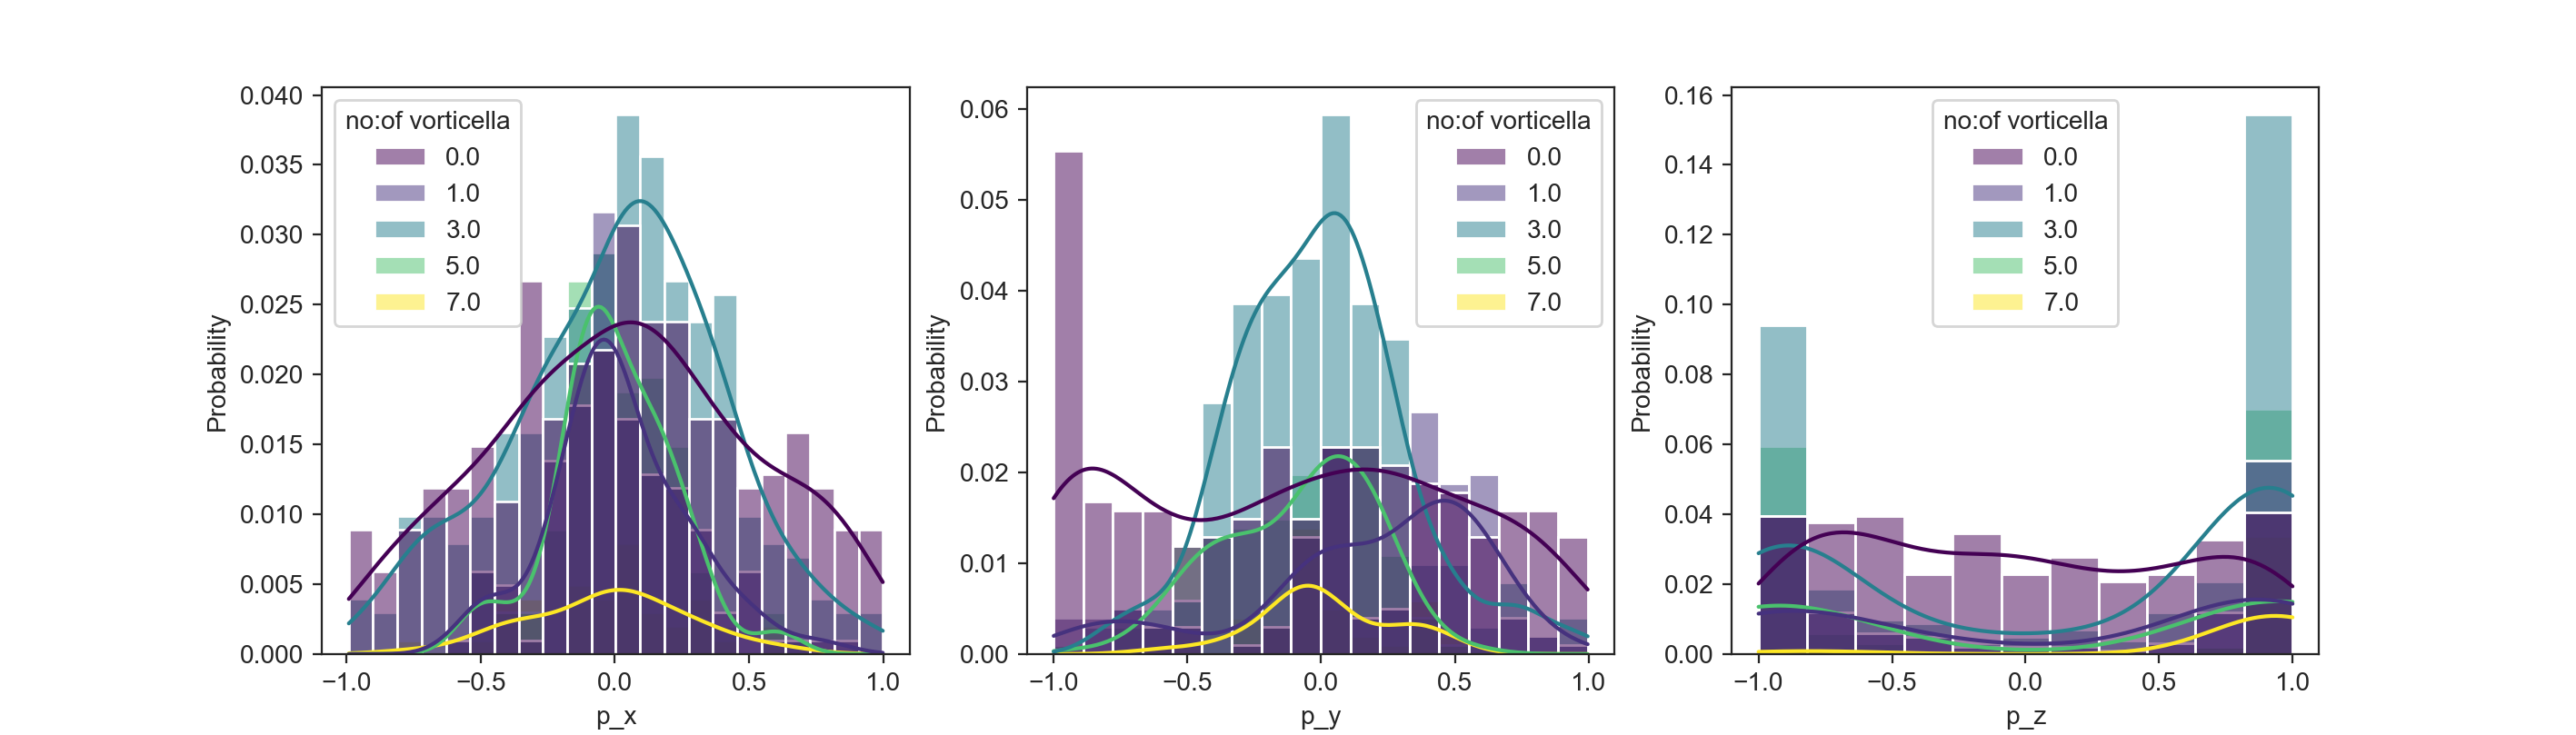

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols = 3, figsize = (14,4))

sns.histplot(df, x = 'p_x', hue = "no:of vorticella",  stat = "probability", kde = True, palette="viridis", ax = ax1)

sns.histplot(df, x = 'p_y', hue = "no:of vorticella",  stat = "probability", kde = True, palette="viridis", ax = ax2)

sns.histplot(df, x = 'p_z', hue = "no:of vorticella",  stat = "probability", kde = True, palette="viridis", ax = ax3)
if(save):
    plt.savefig('Angular velocity orientation component_cartesian' + '.png', dpi = 300)
    plt.savefig('Angular velocity orientation component_cartesian' + '.svg', dpi = 300)

<IPython.core.display.Javascript object>


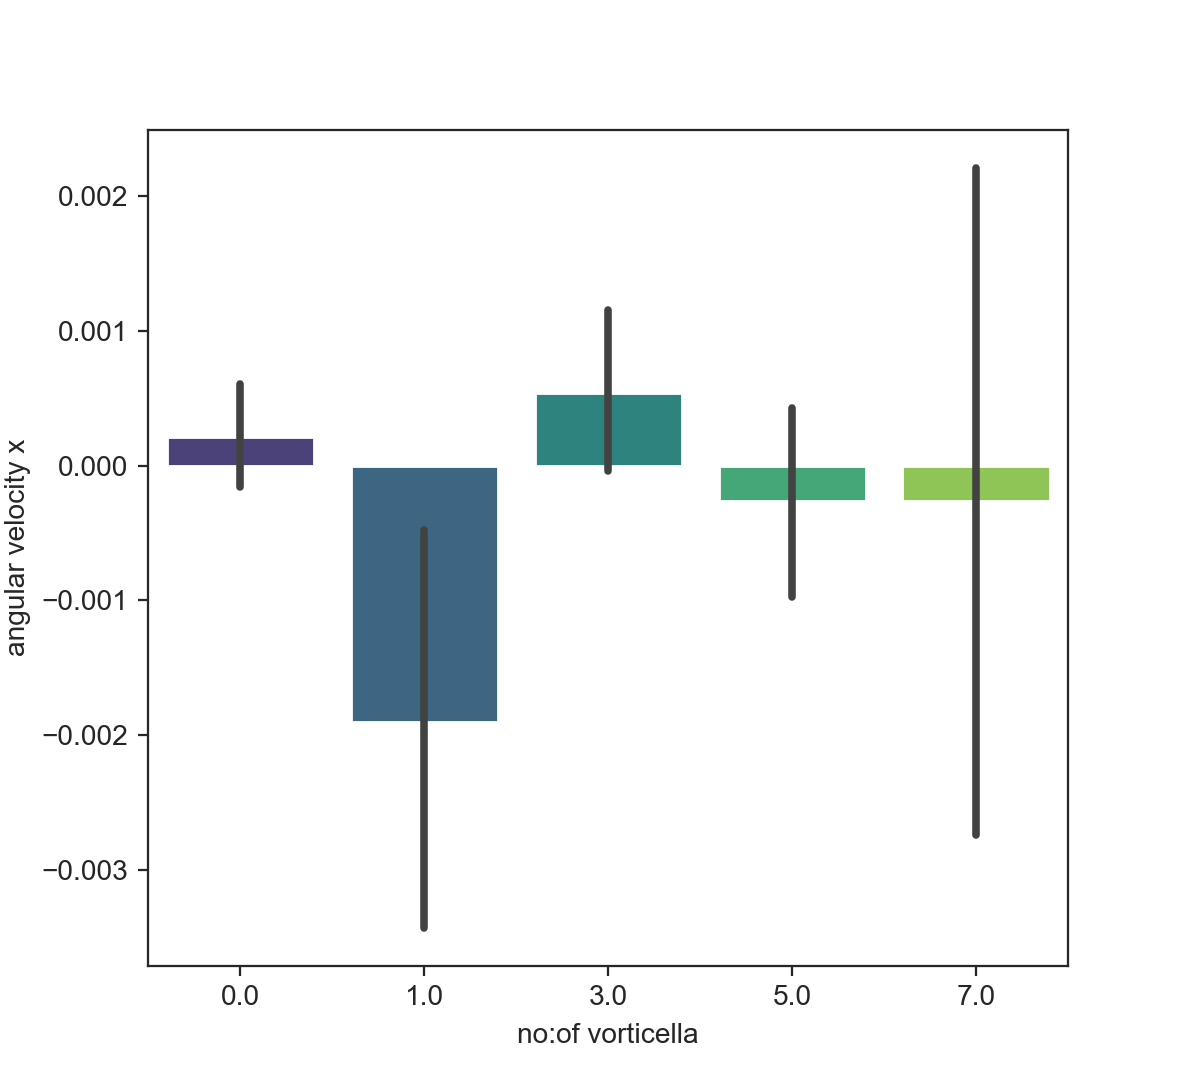

<IPython.core.display.Javascript object>


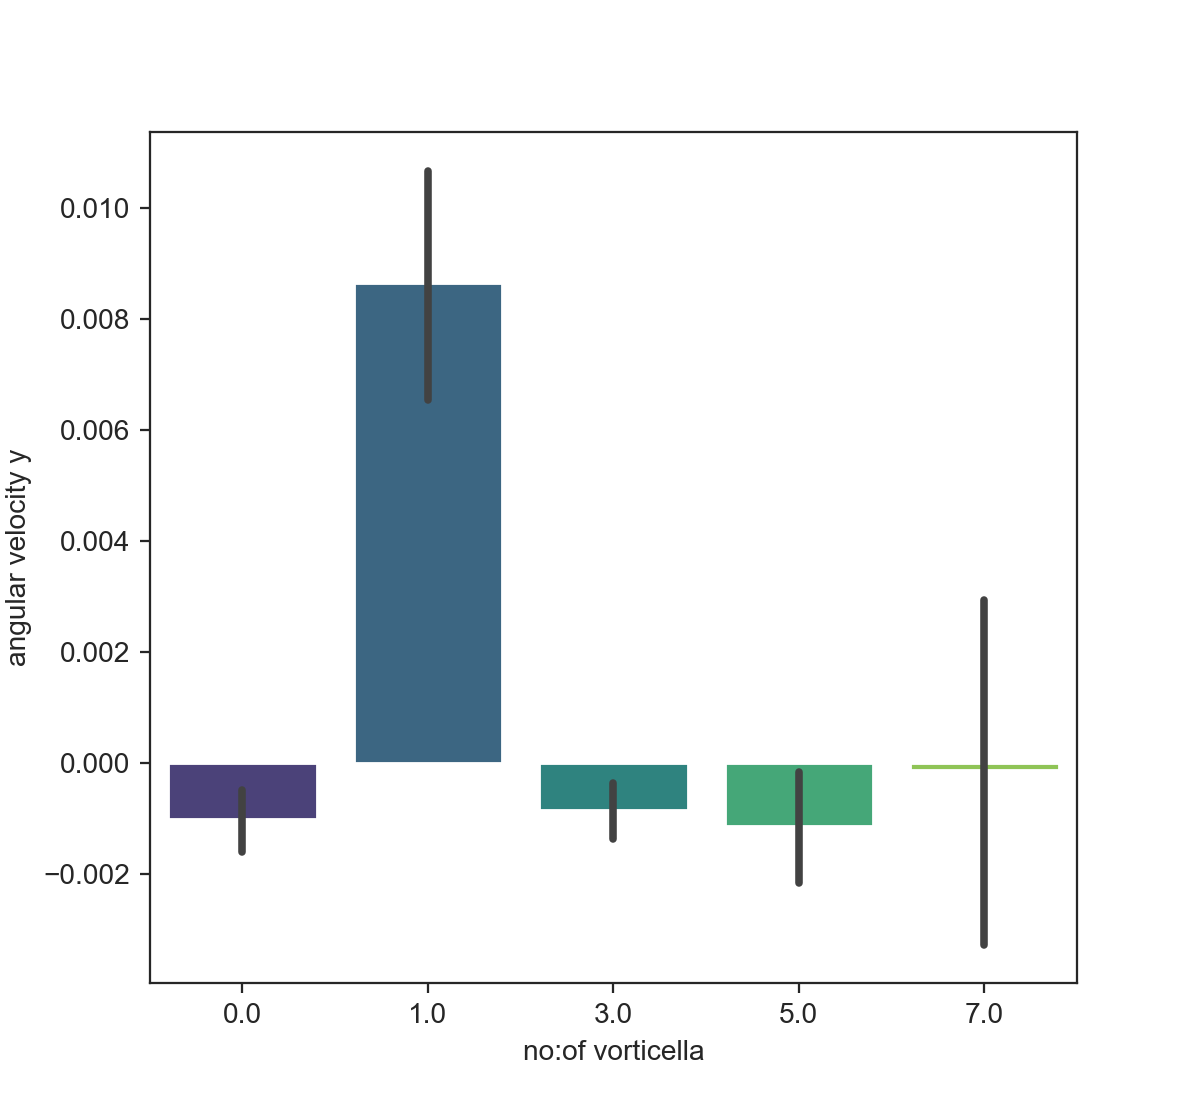

<IPython.core.display.Javascript object>


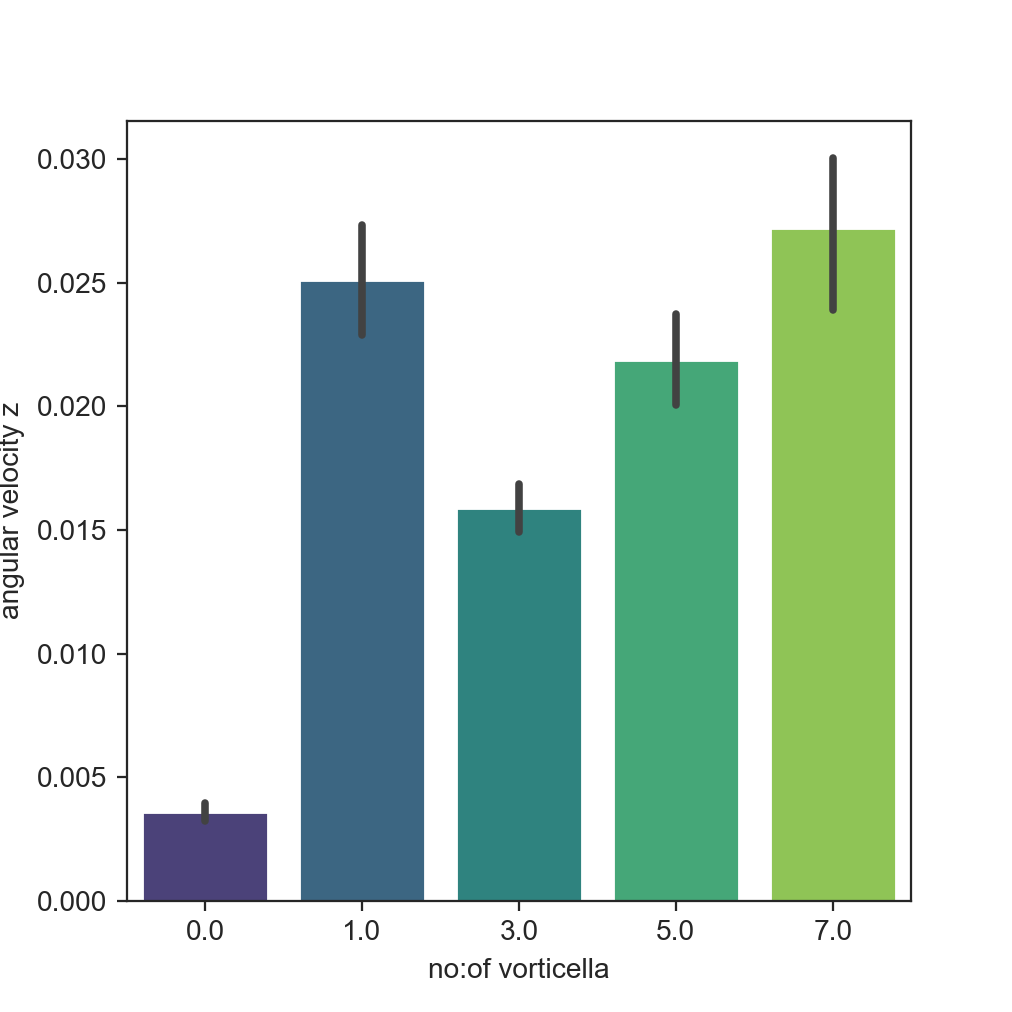

In [127]:
# Effect of vorticella on individual components of the rotation velocity vector
df['angular velocity z'] = abs(df['angular velocity z'])

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="angular velocity x", data=df, palette="viridis")

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="angular velocity y", data=df, palette="viridis")

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="angular velocity z", data=df, palette="viridis")

<IPython.core.display.Javascript object>


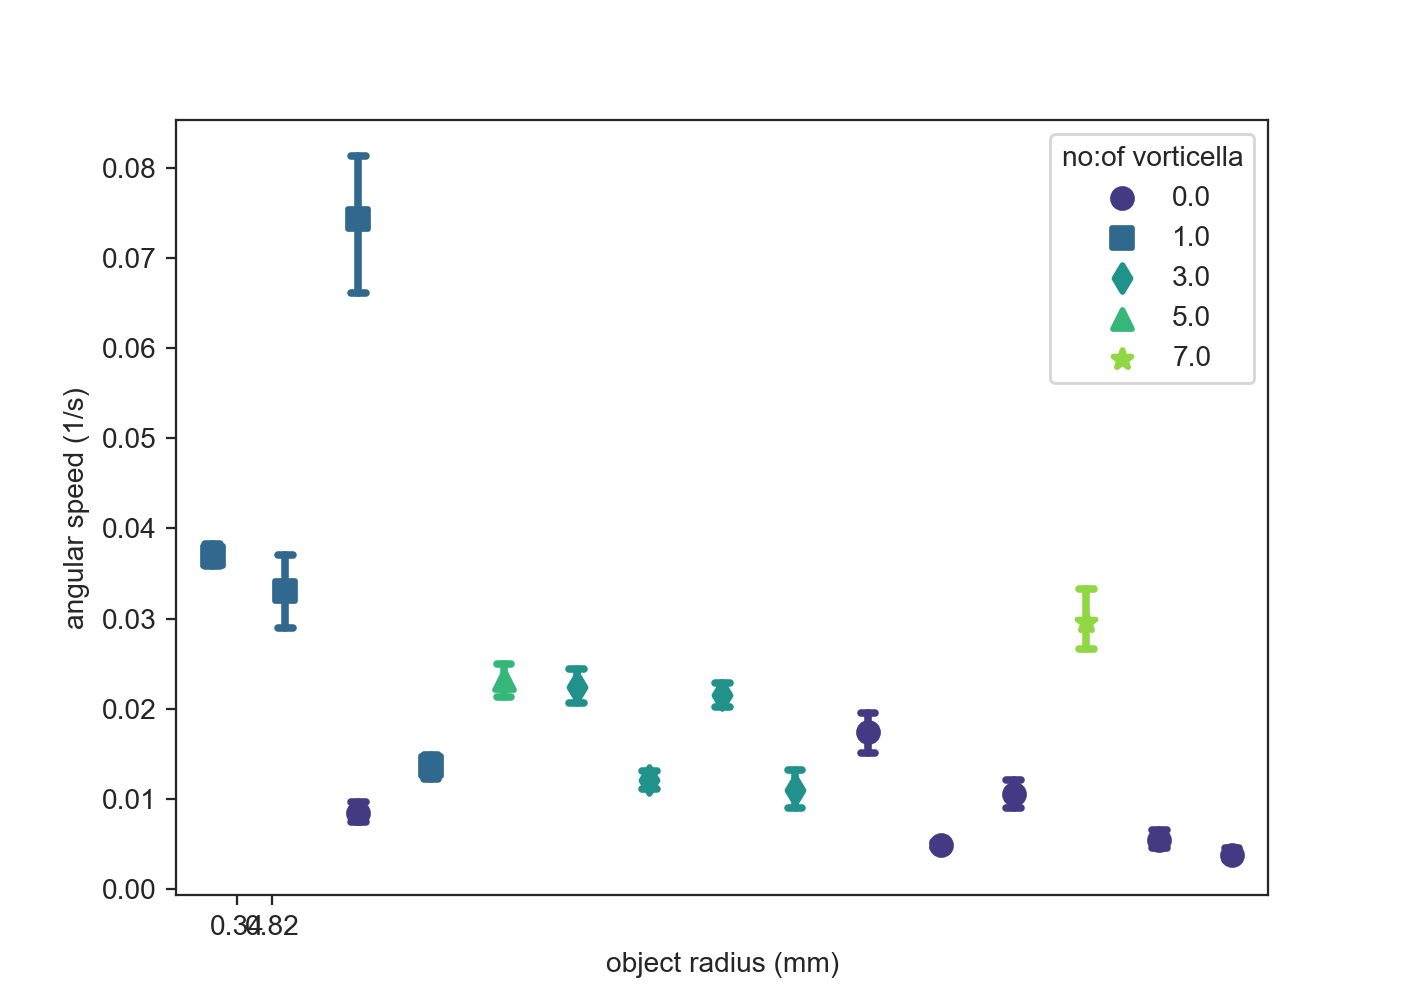

[0.34, 0.82]
['0.34', '0.82']


[Text(0, 0, '0.34'), Text(0, 0, '0.82')]

In [113]:
# Rotation rate vs sphere size (whole dataset)
markers = ['o', 's', 'd','^','*']
plt.figure()
ax1 = sns.pointplot(x="object radius (mm)", y="angular speed (1/s)", hue= "no:of vorticella", data=df, palette="viridis", capsize=0.2, join = False, markers = markers)
ticks = []
for tick_value in np.linspace(np.min(df['object radius (mm)']), np.max(df['object radius (mm)']),2):
    ticks.append(np.round(tick_value,2))

print(ticks)
ax1.set_xticks(ticks)
tick_label = []
for tick_value in ticks:
    tick_label.append(str(tick_value))

print(tick_label)
ax1.set_xticklabels(tick_label)

# No:of tracks, spheres per condition

In [53]:
# # Load the tracks with the features
folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/RotationalAnalysis/FinalAnalysis'
analysis_file = 'RotationalAnalysis_FeatureTracks_combined.csv'

df_feature_tracks = pd.read_csv(os.path.join(folder, analysis_file))

df_feature_tracks['no:of vorticella'] = np.nan
# No:of vorticella mapping
df_num_vorticella = pd.read_csv(os.path.join(folder, 'Sphere_Vorticella_numbers.csv'))

for ii in range(len(df_num_vorticella)):
    
    track_id = df_num_vorticella['track ID'][ii]
    
    df_feature_tracks['no:of vorticella'].loc[df_feature_tracks['track ID'] == track_id] = int(df_num_vorticella['number of vorticella'][ii])
    
df_feature_tracks

Unnamed: 0   track ID  \
0               0  Sphere003   
1               1  Sphere003   
2               2  Sphere003   
3               3  Sphere003   
4               4  Sphere003   
...           ...        ...   
16252          46  Sphere015   
16253          47  Sphere015   
16254          48  Sphere015   
16255          49  Sphere015   
16256          50  Sphere015   

                                              track file  feature ID   Time  \
0      H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...         0.0   0.25   
1      H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...         0.0   0.53   
2      H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...         0.0   0.84   
3      H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...         0.0   1.12   
4      H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...         0.0   1.39   
...                                                  ...         ...    ...   
16252  D:/Vorticella_GravityMachine/2019_08_23/track8...         2.0  52.02   
16253  D:/Vorticella_GravityMachine/2019_08_23/track8...         2.0  52.79   
16254  D:/Vorticella_GravityMachine/2019_08_23/track8...         2.0  53.55   
16255  D:/Vorticella_GravityMachine/2019_08_23/track8...         2.0  54.38   
16256  D:/Vorticella_GravityMachine/2019_08_23/track8...         2.0  55.23   

       feature centroid X  feature centroid Z  sphere centroid X  \
0              979.256653          360.736633             1008.0   
1              978.385315          361.461700             1006.0   
2              977.197889          362.566322             1006.0   
3              975.279491          364.255566             1006.0   
4              972.825935          365.274857             1004.0   
...                   ...                 ...                ...   
16252          979.920021          566.546547              756.0   
16253          981.918919          568.859726              758.0   
16254          982.263050          562.858494              756.0   
16255          980.427174          561.770359              750.0   
16256          980.712963          560.245682              756.0   

       sphere centroid Z  object diameter (px)  no:of vorticella  
0                  421.0                 342.0               1.0  
1                  421.0                 342.0               1.0  
2                  421.0                 342.0               1.0  
3                  423.0                 342.0               1.0  
4                  425.0                 342.0               1.0  
...                  ...                   ...               ...  
16252              776.0                 732.0               0.0  
16253              768.0                 732.0               0.0  
16254              774.0                 732.0               0.0  
16255              764.0                 732.0               0.0  
16256              770.0                 732.0               0.0  

[16257 rows x 11 columns]

In [58]:
n_vorticella = np.unique(df['no:of vorticella'])
print(n_vorticella)

[0. 1. 3. 5. 7.]


In [59]:
# Find number of distinct tracks/spheres per condition
distinct_tracks = np.zeros(len(n_vorticella))
distinct_spheres = np.zeros(len(n_vorticella))
total_track_durations = np.zeros(len(n_vorticella))

for ii, n in enumerate(n_vorticella):
    
    df_temp = df.loc[df['no:of vorticella'] == n]
    distinct_tracks[ii] = len(np.unique(df_temp['track file']))
    distinct_spheres[ii] = len(np.unique(df_temp['track ID']))
    
    tracks_per_condition = np.unique(df_temp['track file'])
    
    
    for track in tracks_per_condition:
        print(track)
        df_track = df_temp.loc[df_temp['track file'] == track]
        
        time_array = np.array(df_track['Time (s)']) # This consists of many time segments that are joined together
 
       
        # Find the time segments by detecting non-increasing/disctinuous change in time
        mask = np.array([(i < j) and (abs(i - j)<= 10) for i, j in zip(time_array, time_array[1:])], dtype = 'bool')
        print(mask)
        index = np.array(range(len(time_array)-1))
        segment_index = index[np.logical_not(mask)]
        
        
        
        if(segment_index.size != 0):
            print('Track segments detected')
            segment_index = segment_index + 1 
            segment_index = np.insert(segment_index, 0, 0)
            print(segment_index)
            time_segments = {jj:[] for jj in range(len(segment_index)-1)}
            print(time_segments)
            for jj in range(len(segment_index)-1):

                time_segments[jj] = time_array[segment_index[jj]:segment_index[jj+1]]

                print(time_segments[jj])

                res = all(i < j for i, j in zip(time_segments[jj], time_segments[jj][1:]))
                assert res == True, "Time should be strictly increasing"

                track_duration = time_segments[jj][-1] - time_segments[jj][0]

                assert track_duration>=0, 'Time array non-increasing!'

                total_track_durations[ii]+=track_duration
                
        else:
            print('No track segments')
            print(time_array)
            track_duration = time_array[-1] - time_array[0]
            assert track_duration>=0, 'Time array non-increasing!'

            total_track_durations[ii]+=track_duration
            
            
            
        
        print(time_array)
        
    
df_tracks_spheres = pd.DataFrame({'no:of vorticella':n_vorticella, 'No:of distinct tracks':distinct_tracks, 'No:of distinct spheres':distinct_spheres, 'Total duration (s)':total_track_durations})
# df_tracks_spheres.to_csv(os.path.join(plots_folder, 'Tracks_Spheres_Duration-per_condition.csv'))

df_tracks_spheres

D:/Vorticella_GravityMachine/2019_08_23/track8/track000.csv
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Track segments detected
[0 8]
{0: []}
[107.84 109.45 111.09 112.62 114.24 115.83 117.38 118.96]
[107.84 109.45 111.09 112.62 114.24 115.83 117.38 118.96  18.55  20.12
  21.76  23.43  24.96  26.6   28.23  29.79  31.31  32.89  34.47  36.03
  37.64  39.27  40.81  42.32  43.95  45.56  47.17  48.76  50.41  52.02]
D:/Vorticella_GravityMachine/2019_08_23/track9/track000.csv
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
No track segments
[ 3.86  5.41  6.99  8.51  9.99 11.57 13.2  14.72 16.29 17.79 1

no:of vorticella  No:of distinct tracks  No:of distinct spheres  \
0               0.0                    7.0                     6.0   
1               1.0                    3.0                     2.0   
2               3.0                    4.0                     1.0   
3               5.0                    1.0                     1.0   
4               7.0                    1.0                     1.0   

   Total duration (s)  
0              322.42  
1              178.03  
2              353.21  
3              165.01  
4               50.12

In [60]:
df_tracks_spheres.to_csv(os.path.join(plots_folder, 'Tracks_Spheres_Duration-per_condition_FromRotationTracks.csv'))


# Checking for Wall-effects, Size effects etc. on Rotation Dynamics

In [33]:
# Wall-effects on the aggregate dynamics

# Find the aggregate's minimum distance to wall
df['Min distance to wall X (mm)'] = None
df['Min distance to wall Y (mm)'] = None

for ii in range(len(df)):
    
    df['Min distance to wall X (mm)'][ii] = min(abs(df['X pos (mm)'][ii] - left_wall), abs(df['X pos (mm)'][ii] - right_wall))
    df['Min distance to wall Y (mm)'][ii] = min(abs(df['Y pos (mm)'][ii] - df['Front wall (mm)'][ii]), abs(df['Y pos (mm)'][ii] - df['Back wall (mm)'][ii]))
    
df

C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Time (s)   track ID  \
0              0             0               0      3.21  Sphere003   
1              1             1               1      4.62  Sphere003   
2              2             2               2      5.99  Sphere003   
3              3             3               3      7.42  Sphere003   
4              4             4               4      8.79  Sphere003   
...          ...           ...             ...       ...        ...   
1005          17            17              17     45.56  Sphere015   
1006          18            18              18     47.17  Sphere015   
1007          19            19              19     48.76  Sphere015   
1008          20            20              20     50.41  Sphere015   
1009          21            21              21     52.02  Sphere015   

                                             track file  angular velocity x  \
0     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011282   
1     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011616   
2     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.009606   
3     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.004739   
4     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.005074   
...                                                 ...                 ...   
1005  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000307   
1006  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.001029   
1007  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.002599   
1008  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000207   
1009  D:/Vorticella_GravityMachine/2019_08_23/track8...           -0.004495   

      angular velocity y  angular velocity z object diameter (mm)  \
0               0.011064            0.003670                 None   
1               0.007746            0.001117                 None   
2               0.008493           -0.002662                 None   
3               0.014169           -0.006719                 None   
4               0.020293           -0.009254                 None   
...                  ...                 ...                  ...   
1005           -0.003121            0.000018                 None   
1006           -0.001388            0.001920                 None   
1007            0.000316           -0.001841                 None   
1008           -0.000068           -0.000577                 None   
1009           -0.003277            0.000649                 None   

                                         new track file  X pos (mm)  \
0     E:/GravityMachine_Deepak/Vorticella_GM_Montere...   -5.674000   
1                                                   NaN   -5.660835   
2                                                   NaN   -5.664252   
3                                                   NaN   -5.652000   
4                                                   NaN   -5.643028   
...                                                 ...         ...   
1005                                                NaN    4.638000   
1006                                                NaN    4.660048   
1007                                                NaN    4.684000   
1008                                                NaN    4.710000   
1009                                                NaN    4.732497   

      Y pos (mm)  Front wall (mm)  Back wall (mm)  angular speed (1/s)  \
0        1.42200             -0.5             4.5             0.016223   
1        1.42200             -0.5             4.5             0.014006   
2        1.42562             -0.5             4.5             0.013096   
3        1.41600             -0.5             4.5             0.016382   
4        1.38200             -0.5             4.5             0.022873   
...          ...              ...             ...                  ...   
1005

<IPython.core.display.Javascript object>


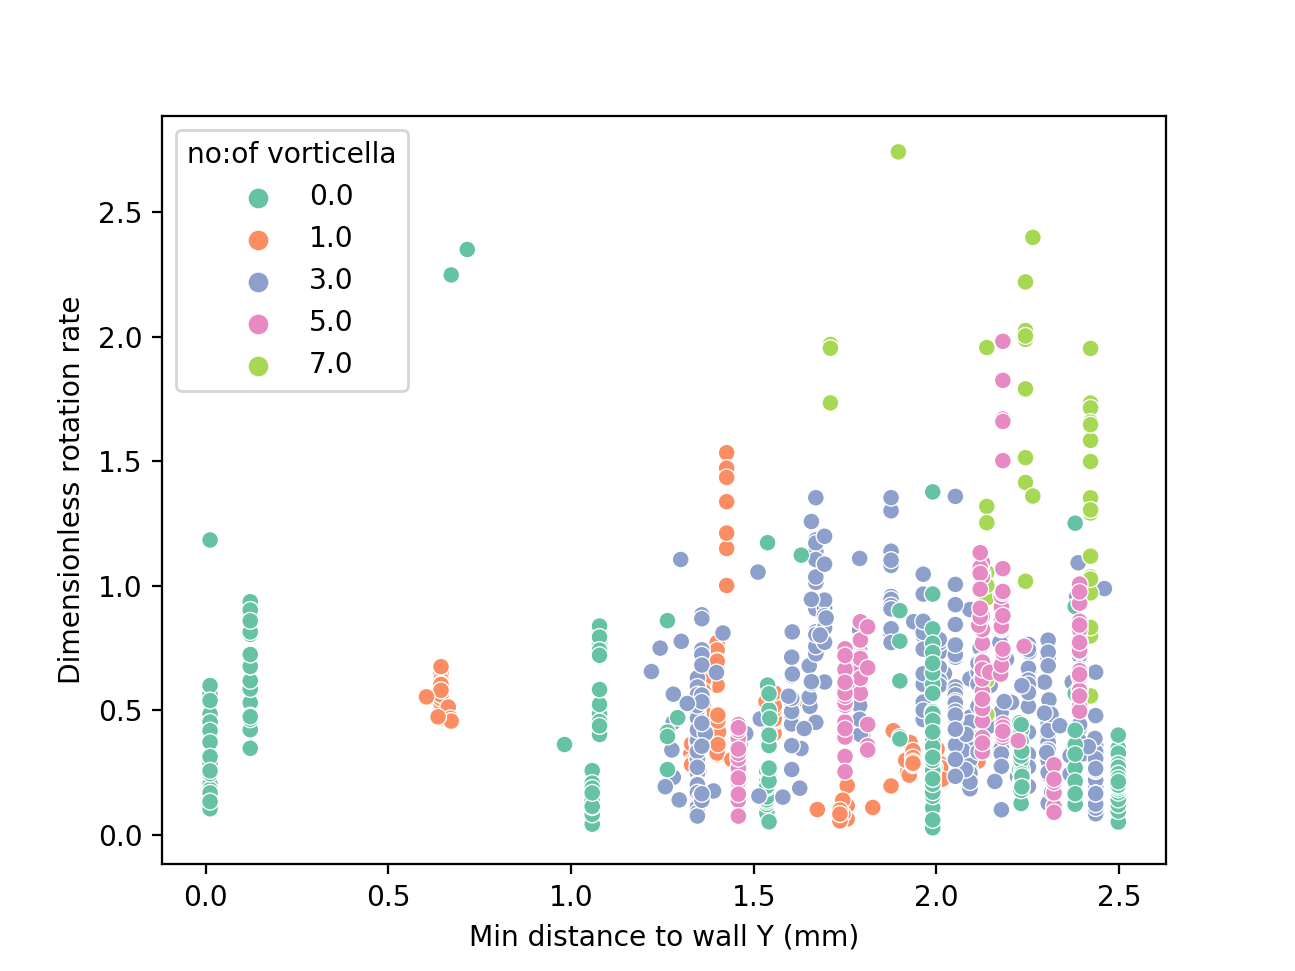

<IPython.core.display.Javascript object>


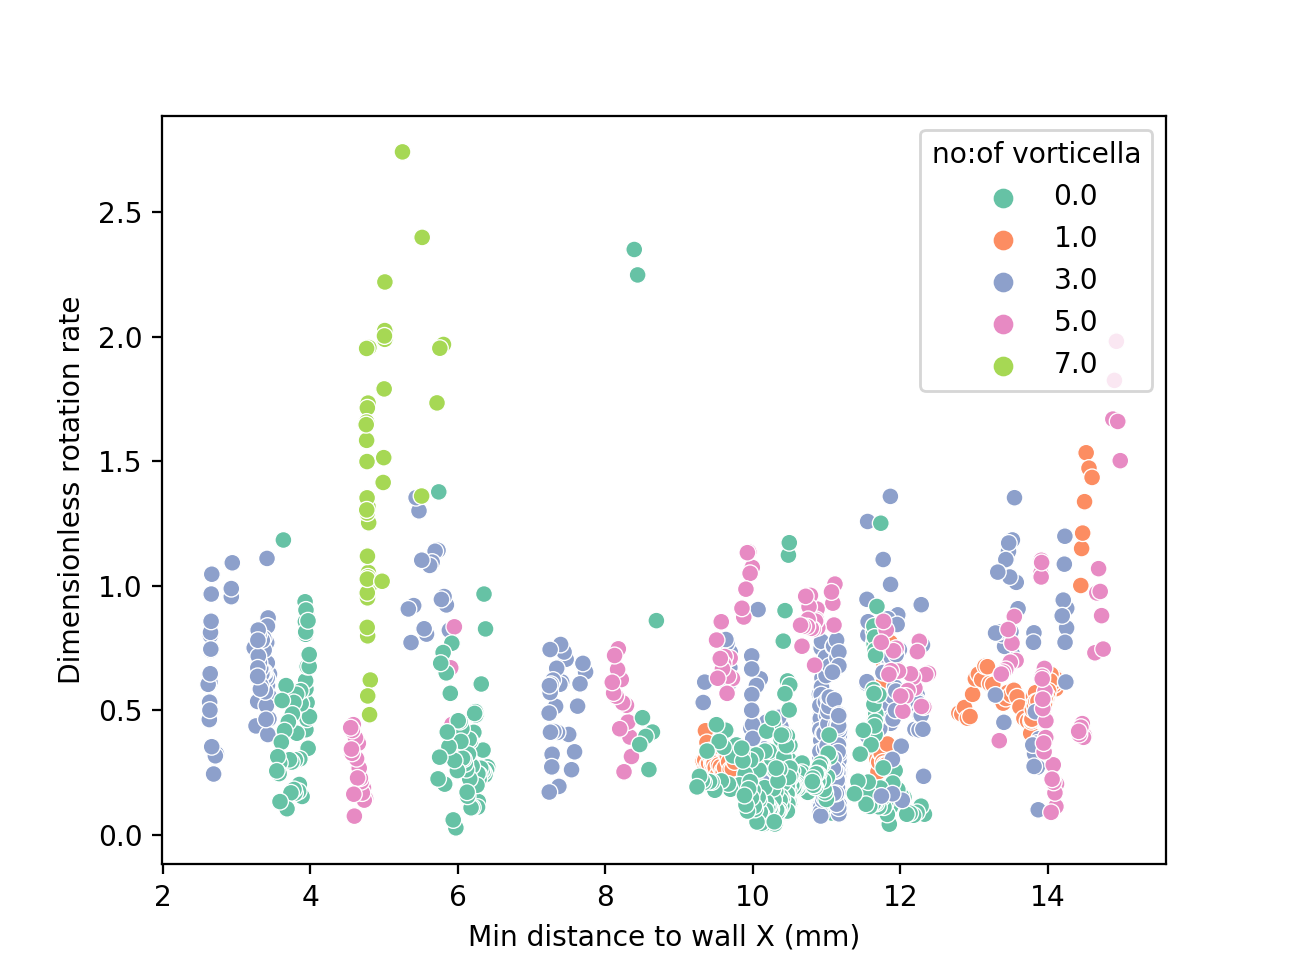

In [28]:
# Scatter plot of angular speed vs minimum distance to wall in X and Y directions

plt.figure()
sns.scatterplot(x = 'Min distance to wall Y (mm)', y = 'Dimensionless rotation rate', hue = 'no:of vorticella', data = df,palette="Set2")
plt.show()

plt.figure()
sns.scatterplot(x = 'Min distance to wall X (mm)', y = 'Dimensionless rotation rate', hue = 'no:of vorticella', data = df,palette="Set2")
plt.show()

<IPython.core.display.Javascript object>


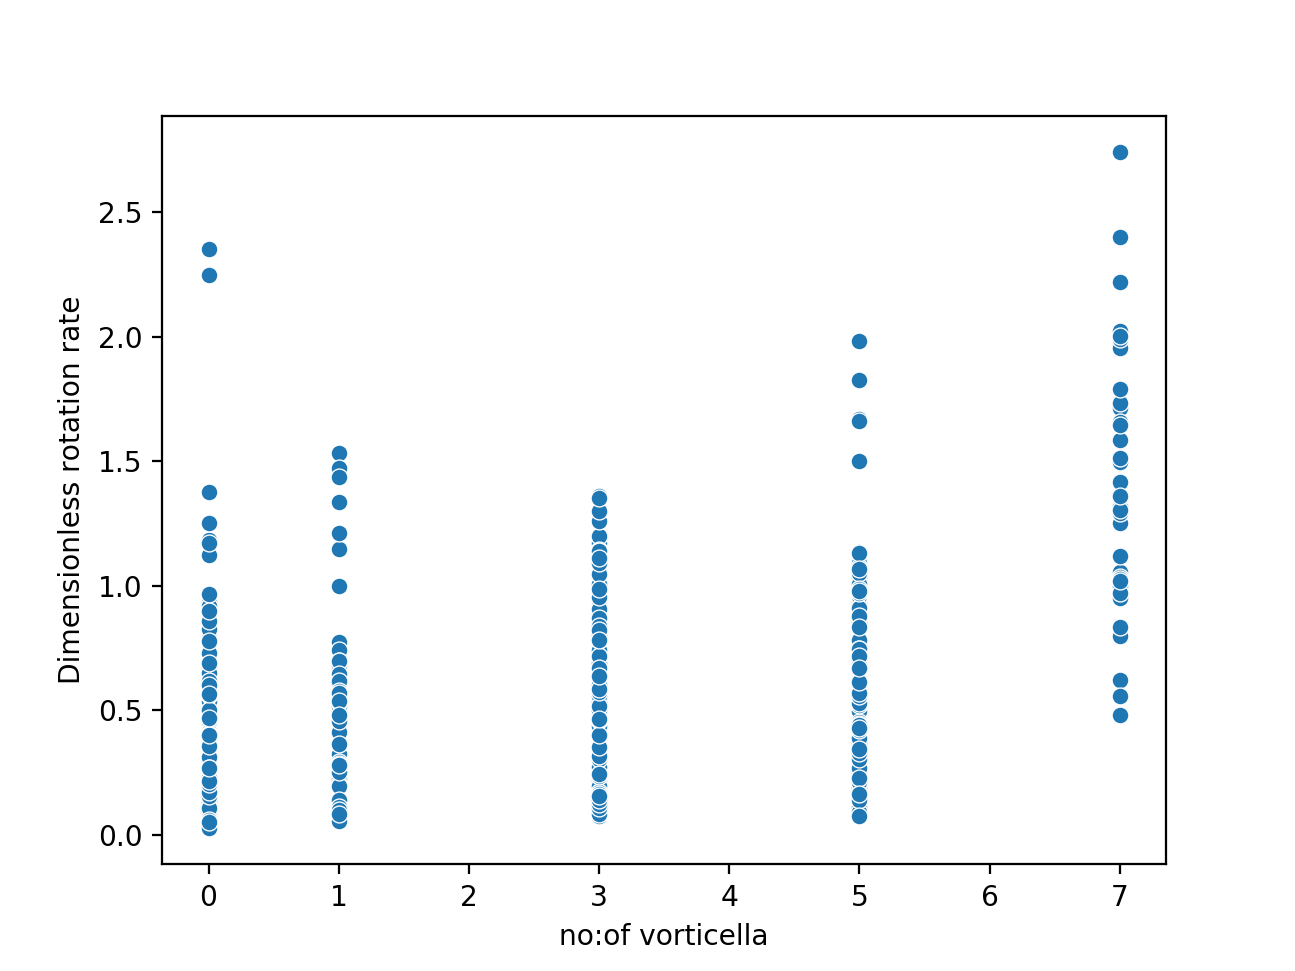

In [29]:
# Scatter plot of angular speed vs no:of vorticella
plt.figure()
sns.scatterplot(x = 'no:of vorticella', y = 'Dimensionless rotation rate', data = df,palette="Set2")
plt.show()

### Data averaged over individual tracks

In [32]:
# Find mean and std values for each unique track

track_files = np.unique(df['track file'])
spheres = np.unique(df['track ID'])
print(track_files)
print(spheres)

['D:/Vorticella_GravityMachine/2019_08_23/track1/track000.csv'
 'D:/Vorticella_GravityMachine/2019_08_23/track8/track000.csv'
 'D:/Vorticella_GravityMachine/2019_08_23/track9/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track10/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track11/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track8/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/Track3/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/Track5/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track10/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track12/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track8/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track9/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track1/track000.csv'
 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/trac

In [64]:
df_derived = pd.DataFrame({'track file':[], 'track ID':[], 'object radius (mm)':[], 'no:of vorticella':[], 'avg distance to wall X':[], 'avg distance to wall Y':[], 'avg dimensionless rotation rate':[], 'std dimensionless rotation rate':[]})
df_temp = pd.DataFrame({})
for track in track_files:
    
    df_subset = df[df['track file'] == track]
    

    df_temp = pd.DataFrame({'track file':[ track], 'track ID':[df_subset['track ID'].iloc[0]], 
                            'object radius (mm)':[df_subset['object radius (mm)'].iloc[0]],
                            'no:of vorticella':[df_subset['no:of vorticella'].iloc[0]], 
                            'avg distance to wall X':[np.nanmean(df_subset['Min distance to wall X (mm)'])], 
                            'avg distance to wall Y':[np.nanmean(df_subset['Min distance to wall Y (mm)'])], 
                            'avg dimensionless rotation rate':[np.nanmean(df_subset['Dimensionless rotation rate'])], 
                            'std dimensionless rotation rate':[np.nanstd(df_subset['Dimensionless rotation rate'])]})
  
 
    
 
    df_derived = df_derived.append(df_temp)
    

In [65]:
df_derived

track file   track ID  \
0  D:/Vorticella_GravityMachine/2019_08_23/track1...  Sphere013   
0  D:/Vorticella_GravityMachine/2019_08_23/track8...  Sphere015   
0  D:/Vorticella_GravityMachine/2019_08_23/track9...  Sphere015   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...  Sphere004   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...  Sphere004   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...  Sphere003   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere005   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere006   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere007   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere006   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere006   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere006   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere008   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere009   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere011   
0  H:/2019 Monterey Trip/Vorticella_GM/2019_08_22...  Sphere012   

   object radius (mm)  no:of vorticella  avg distance to wall X  \
0               0.474               5.0               10.741265   
0               0.815               0.0                9.923106   
0               0.815               0.0                6.115027   
0               0.345               1.0               12.878757   
0               0.374               1.0               14.505443   
0               0.381               1.0                9.761653   
0               0.374               0.0               11.500320   
0               0.497               3.0                5.430147   
0               0.626               7.0                4.949533   
0               0.488               3.0               12.723095   
0               0.512               3.0               10.251746   
0               0.494               3.0               11.044396   
0               0.537               0.0               11.649372   
0               0.604               0.0                3.818782   
0               0.824               0.0               10.281246   
0               0.543               0.0               10.476544   

   avg distance to wall Y  avg dimensionless rotation rate  \
0                2.035959                         0.653610   
0                1.483676                         0.602227   
0                1.990109                         0.369592   
0                1.201780                         0.539381   
0                1.426000                         1.305725   
0                1.916421                         0.248529   
0                1.270444                         0.148201   
0                2.027709                         0.667560   
0                2.250872                         1.457640   
0                1.798592                         0.672158   
0                2.084166                         0.363394   
0                1.873712                         0.372253   
0                1.078000                         0.629921   
0                0.056468                         0.484186   
0                2.267838                         0.323445   
0                2.498000                         0.181730   

   std dimensionless rotation rate  
0                         0.328518  
0                         0.520113  
0                         0.242481  
0                         0.129879  
0                         0.178846  
0                         0.088351  
0                         0.063502  
0                         0.229087  
0                         0.516676  
0                         0.290333  
0                         0.169506  
0                         0.179836  
0                         0.155578  
0                         0.249514  
0                         0.188539  
0                         0.071279

<IPython.core.display.Javascript object>


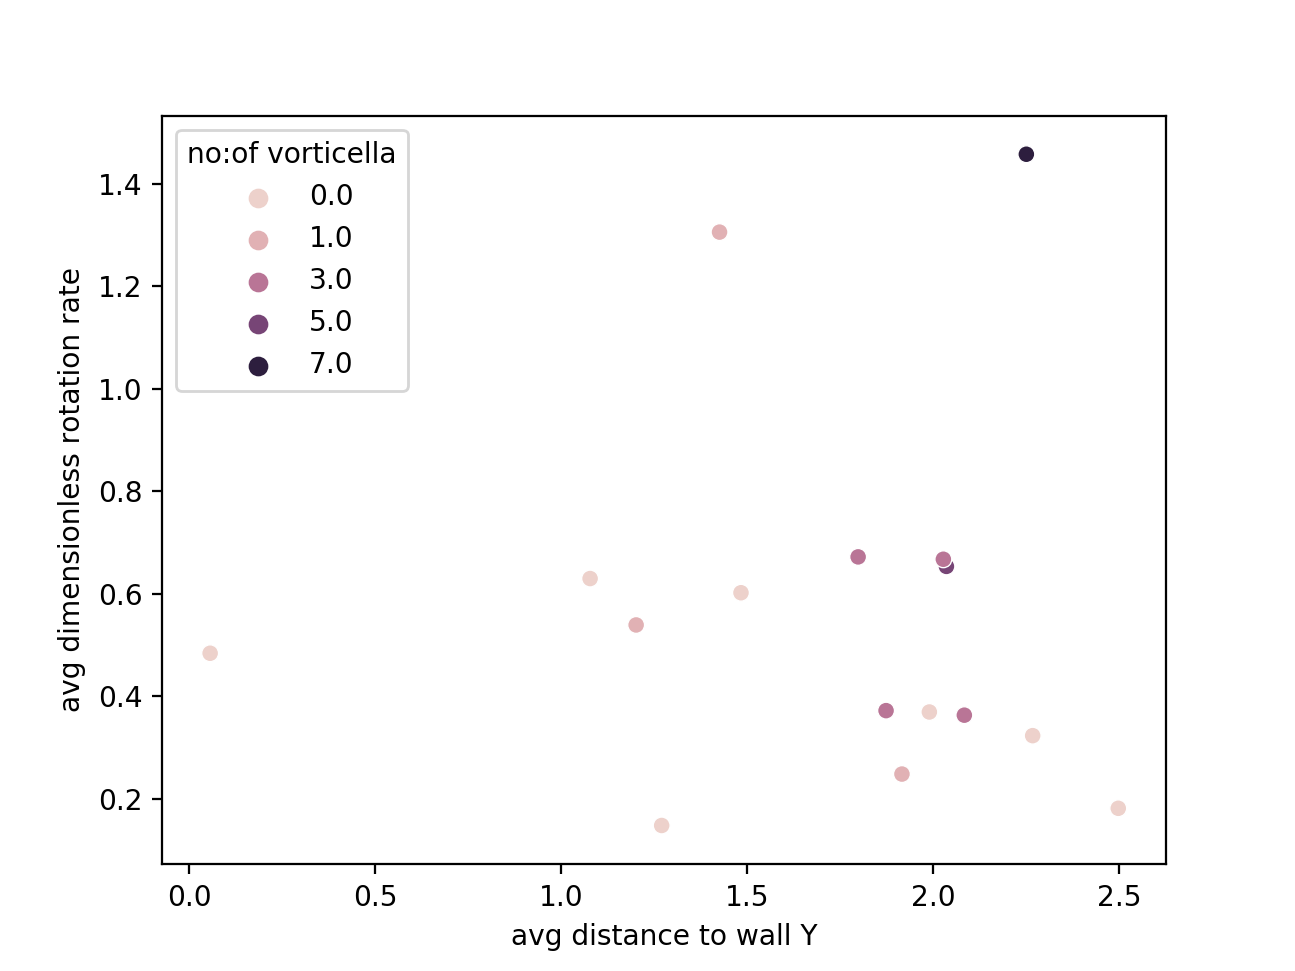

<IPython.core.display.Javascript object>


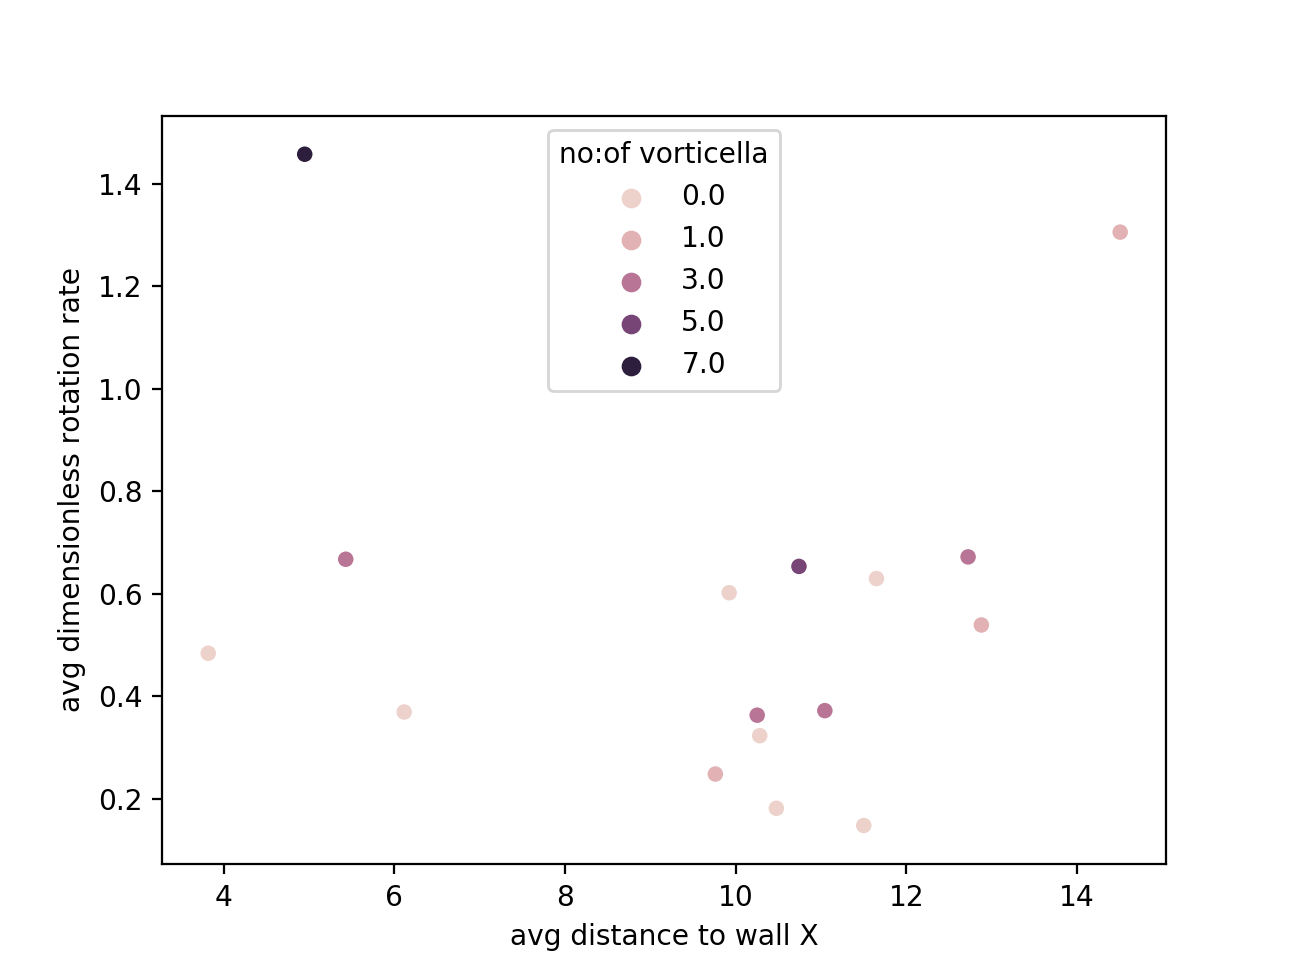

<IPython.core.display.Javascript object>


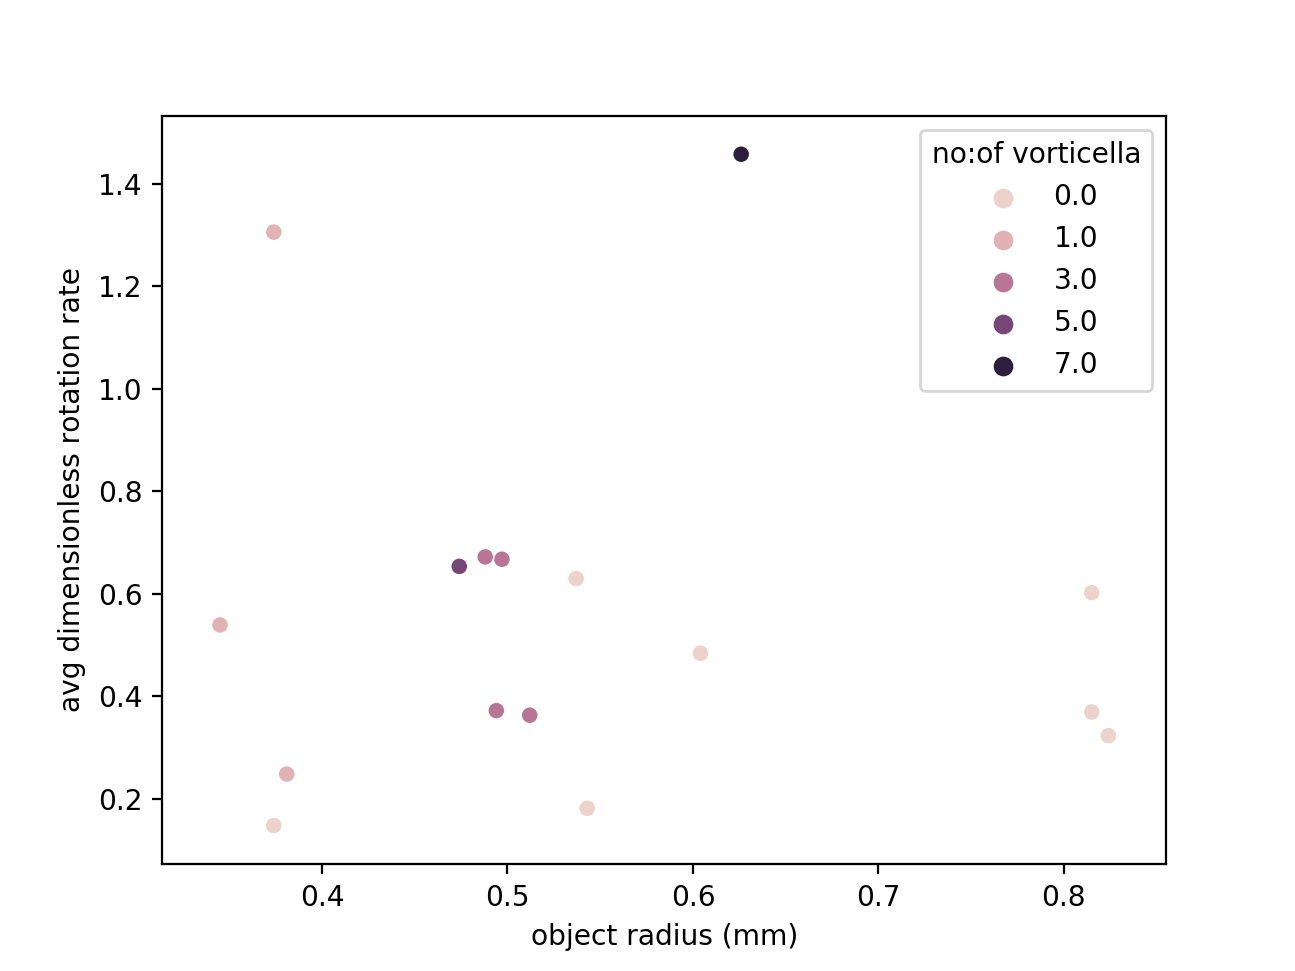

<IPython.core.display.Javascript object>


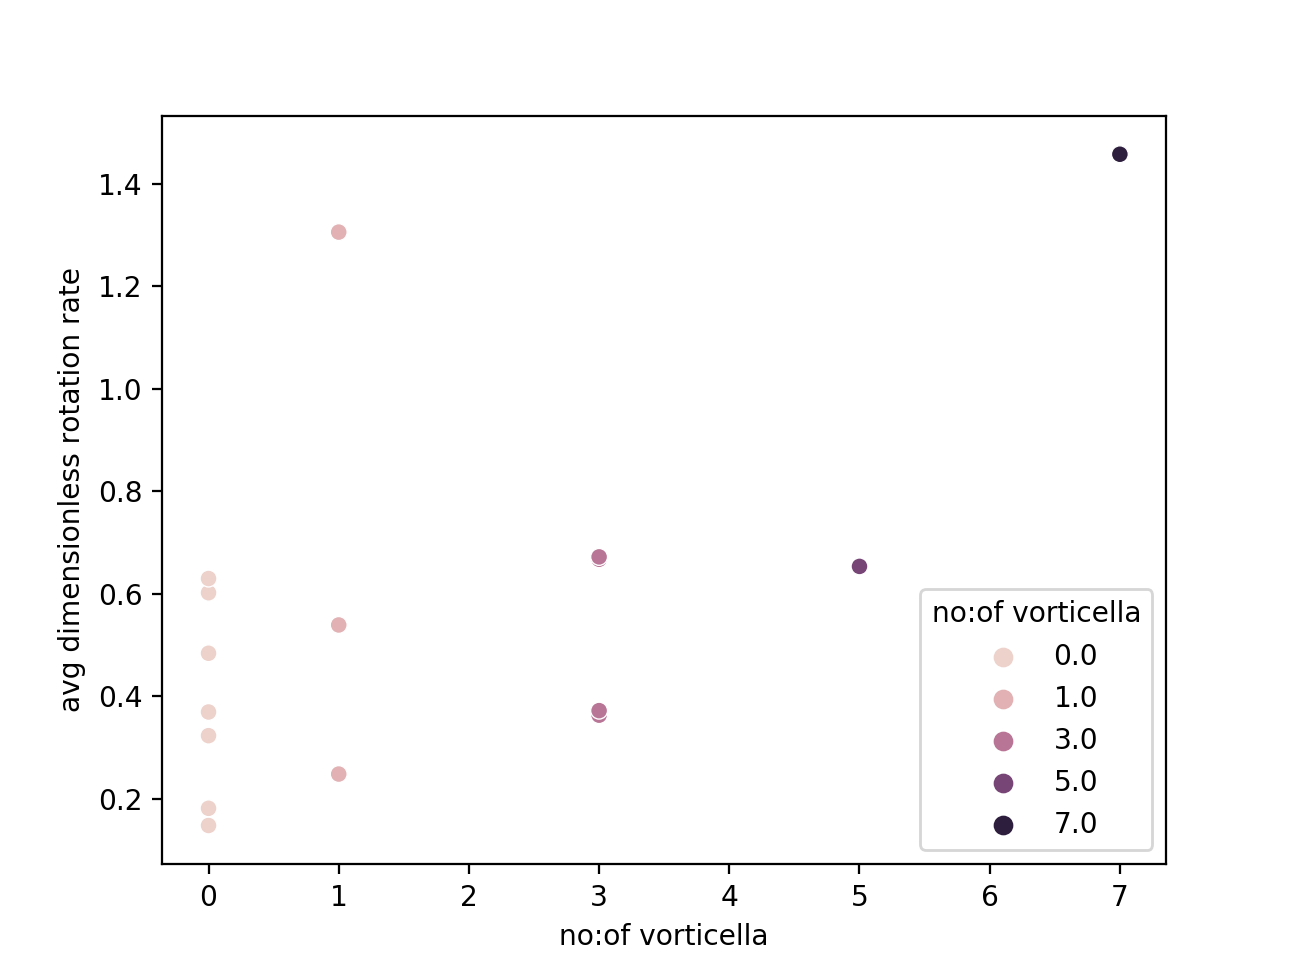

In [97]:
# Y walls
plt.figure()
sns.scatterplot(x = 'avg distance to wall Y', y = "avg dimensionless rotation rate", hue = "no:of vorticella", data = df_derived)
plt.show()

# X walls
plt.figure()
sns.scatterplot(x = 'avg distance to wall X', y = "avg dimensionless rotation rate", hue = "no:of vorticella", data = df_derived)
plt.show()

# Size
plt.figure()
sns.scatterplot(x = 'object radius (mm)', y = "avg dimensionless rotation rate", hue = "no:of vorticella", data = df_derived)
plt.show()

# Vorticella
plt.figure()
sns.scatterplot(x = 'no:of vorticella', y = "avg dimensionless rotation rate", hue = "no:of vorticella", data = df_derived)

plt.show()

<IPython.core.display.Javascript object>


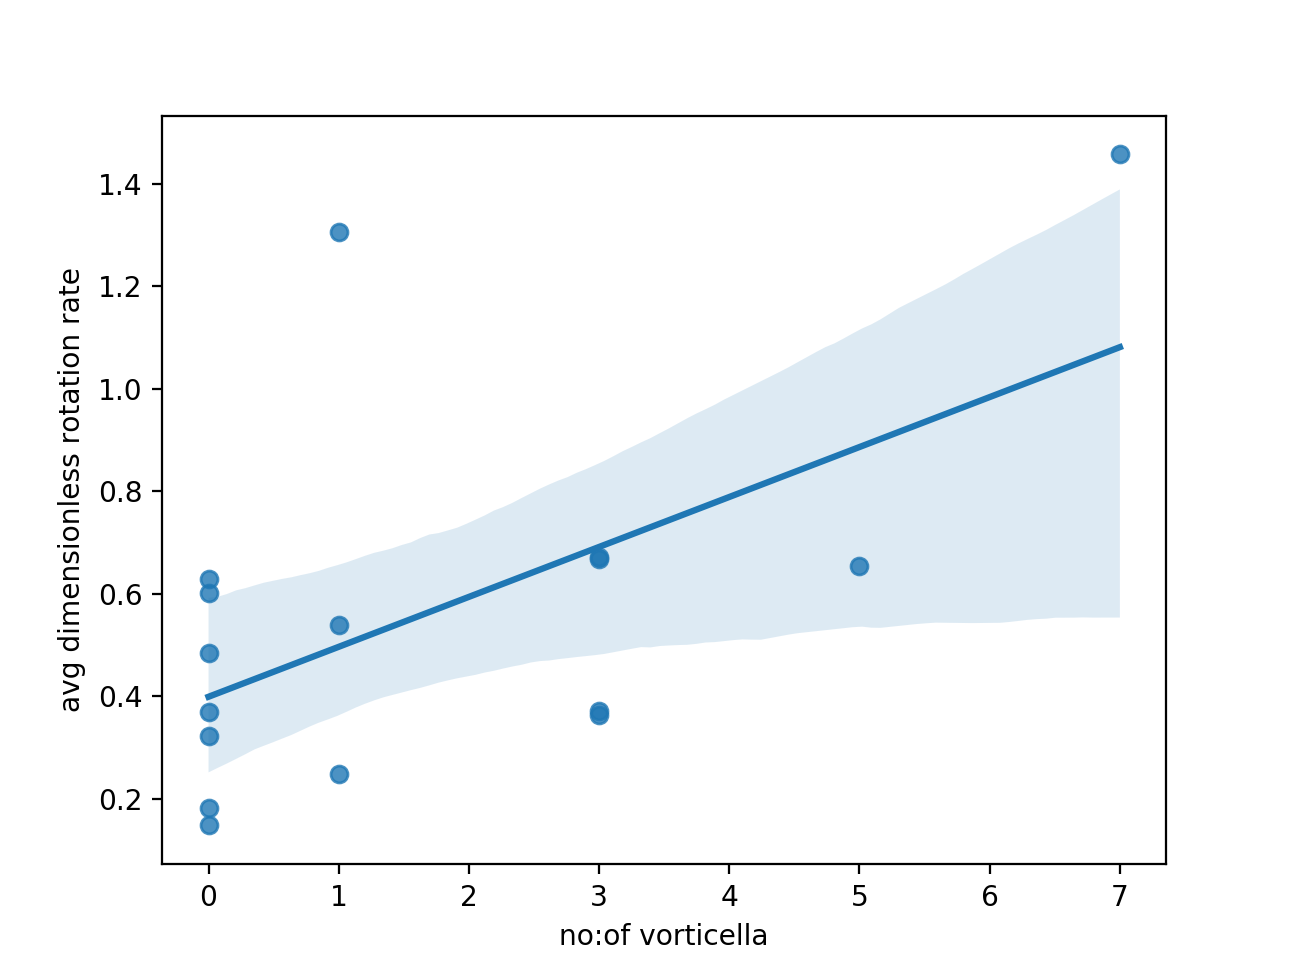

**************************************************
no:of vorticella
coefficient of determination: 0.3228234883357006
intercept: [0.39930065]
slope: [[0.09743491]]
**************************************************


In [98]:
save = True
plt.figure()
sns.regplot(x="no:of vorticella", y="avg dimensionless rotation rate", data=df_derived)
plt.show()
if(save):
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_vorticella_num'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_vorticella_num'+'.png'), dpi =300)
plt.show()

model = linear_model.LinearRegression()
x_data = np.array(df_derived["no:of vorticella"]).reshape((-1, 1))
y_data = np.array(df_derived["avg dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)

print(50*'*')
print('no:of vorticella')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(50*'*')


<IPython.core.display.Javascript object>


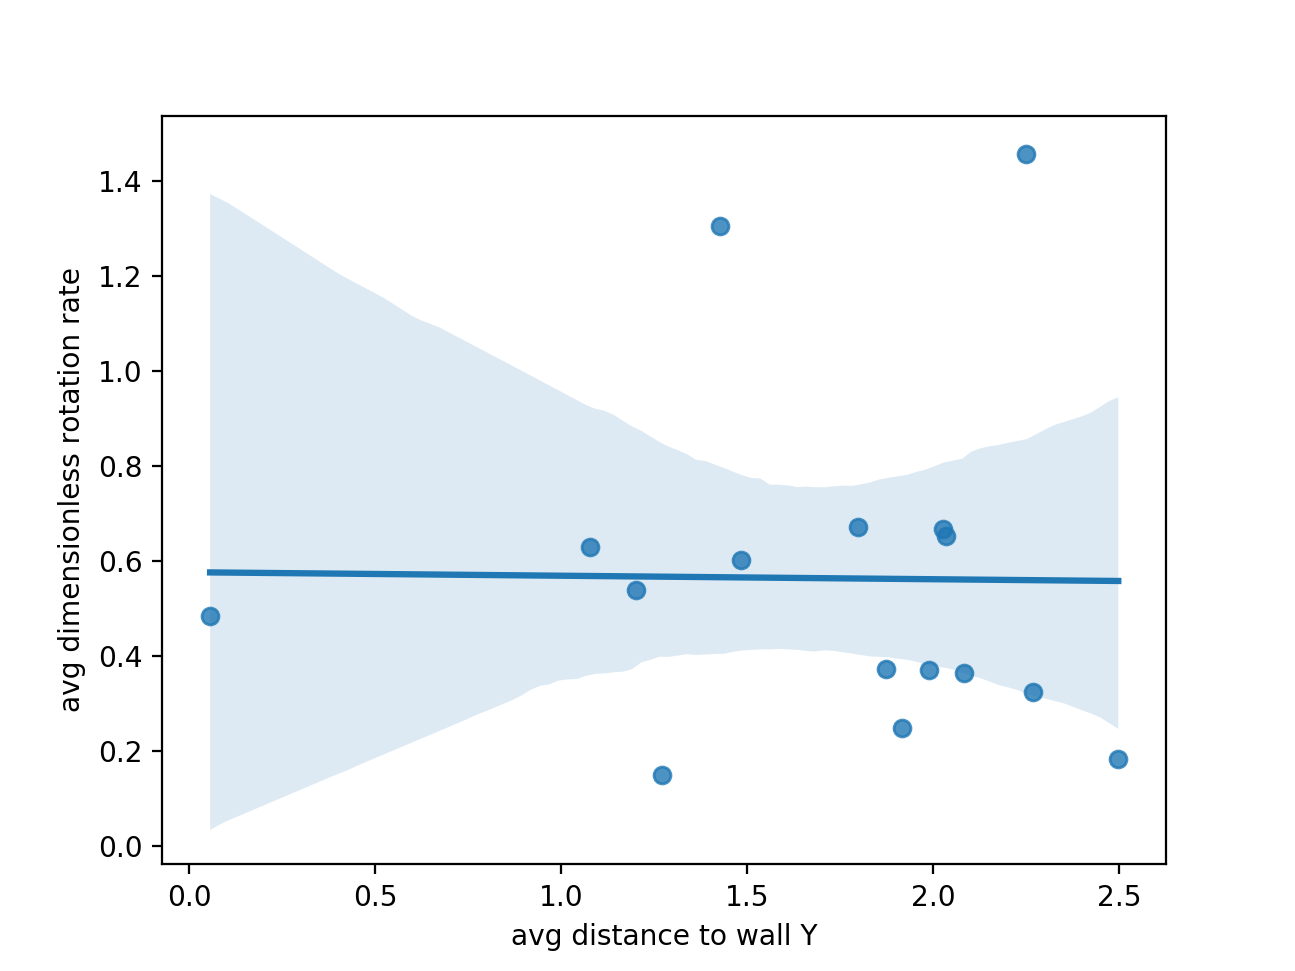

**************************************************
Distance to Wall Y
coefficient of determination: 0.00014928593833685166
intercept: [0.57628637]
slope: [[-0.00737457]]
**************************************************


In [99]:
plt.figure()
sns.regplot(x="avg distance to wall Y", y="avg dimensionless rotation rate", data=df_derived)
if(save):
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_wall_distance_Y'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_wall_distance_Y'+'.png'), dpi =300)
plt.show()
# Wall effects
model = linear_model.LinearRegression()
x_data = np.array(df_derived["avg distance to wall Y"]).reshape((-1, 1))
y_data = np.array(df_derived["avg dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)

print(50*'*')
print('Distance to Wall Y')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(50*'*')


<IPython.core.display.Javascript object>


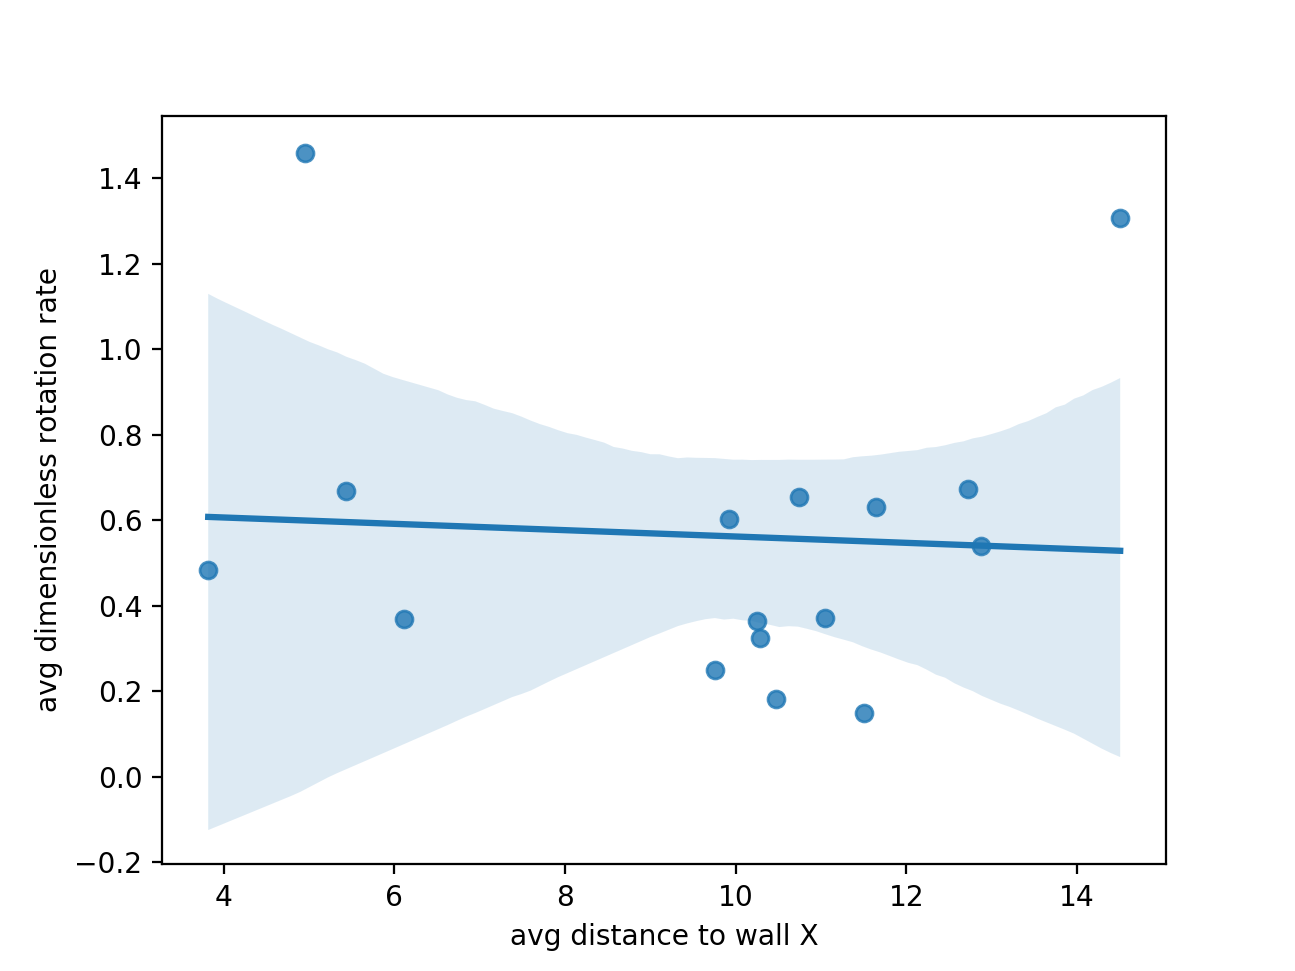

**************************************************
Distance to Wall X
coefficient of determination: 0.003925967814078057
intercept: [0.63600266]
slope: [[-0.007411]]
**************************************************


In [100]:
plt.figure()
sns.regplot(x="avg distance to wall X", y="avg dimensionless rotation rate", data=df_derived)
if(save):
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_wall_distance_X'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_wall_distance_X'+'.png'), dpi =300)
plt.show()
model = linear_model.LinearRegression()
x_data = np.array(df_derived["avg distance to wall X"]).reshape((-1, 1))
y_data = np.array(df_derived["avg dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)

print(50*'*')
print('Distance to Wall X')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(50*'*')


<IPython.core.display.Javascript object>


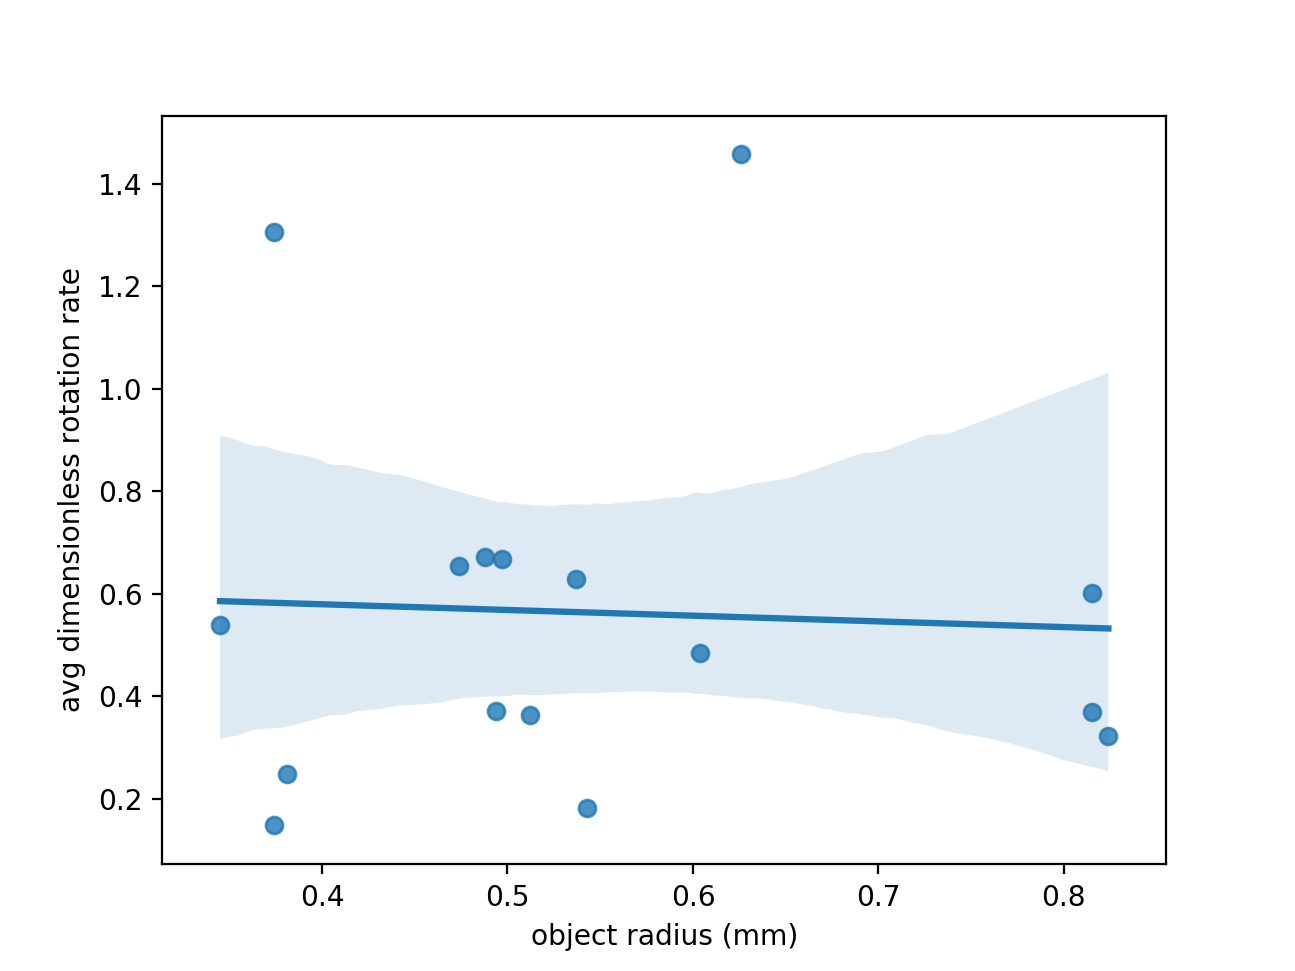

**************************************************
Object size
coefficient of determination: 0.002331014730117875
intercept: [0.62424502]
slope: [[-0.1112682]]
**************************************************


In [101]:
plt.figure()
sns.regplot(x="object radius (mm)", y="avg dimensionless rotation rate", data=df_derived)
if(save):
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_object_size'+'.svg'), dpi =300)
    plt.savefig(os.path.join(plots_folder, 'rotation_rate_vs_object_size'+'.png'), dpi =300)
plt.show()
model = linear_model.LinearRegression()
x_data = np.array(df_derived["object radius (mm)"]).reshape((-1, 1))
y_data = np.array(df_derived["avg dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)

print(50*'*')
print('Object size')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(50*'*')


coefficient of determination: 0.3228234883357006
intercept: [0.39930065]
slope: [[0.09743491]]


In [93]:
# Data averaged over each track







Distance to Wall Y
coefficient of determination: 0.00014928593833685166
intercept: [0.57628637]
slope: [[-0.00737457]]
Distance to Wall X
coefficient of determination: 0.003925967814078057
intercept: [0.63600266]
slope: [[-0.007411]]
Object size
coefficient of determination: 0.002331014730117875
intercept: [0.62424502]
slope: [[-0.1112682]]


In [96]:
# Raw data not averaged over a track
# Vorticella
model = linear_model.LinearRegression()
x_data = np.array(df["no:of vorticella"]).reshape((-1, 1))
y_data = np.array(df["Dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)
print('No:of vorticella')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

print(50*'*')

# Wall effects
model = linear_model.LinearRegression()
x_data = np.array(df["Min distance to wall Y (mm)"]).reshape((-1, 1))
y_data = np.array(df["Dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)

print('Distance to Wall Y')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

print(50*'*')
model = linear_model.LinearRegression()
x_data = np.array(df["Min distance to wall X (mm)"]).reshape((-1, 1))
y_data = np.array(df["Dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)

print('Distance to Wall X')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

print(50*'*')
model = linear_model.LinearRegression()
x_data = np.array(df["object radius (mm)"]).reshape((-1, 1))
y_data = np.array(df["Dimensionless rotation rate"]).reshape((-1, 1))
model.fit(x_data, y_data)

print('Object size')
r_sq = model.score(x_data, y_data)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

No:of vorticella
coefficient of determination: 0.2763853757204634
intercept: [0.30605652]
slope: [[0.09602314]]
**************************************************
Distance to Wall Y
coefficient of determination: 0.0007250748196772072
intercept: [0.54165921]
slope: [[-0.01670147]]
**************************************************
Distance to Wall X
coefficient of determination: 0.015433776805557575
intercept: [0.65014298]
slope: [[-0.01437491]]
**************************************************
Object size
coefficient of determination: 9.069760283997308e-05
intercept: [0.49712499]
slope: [[0.0266402]]


<IPython.core.display.Javascript object>


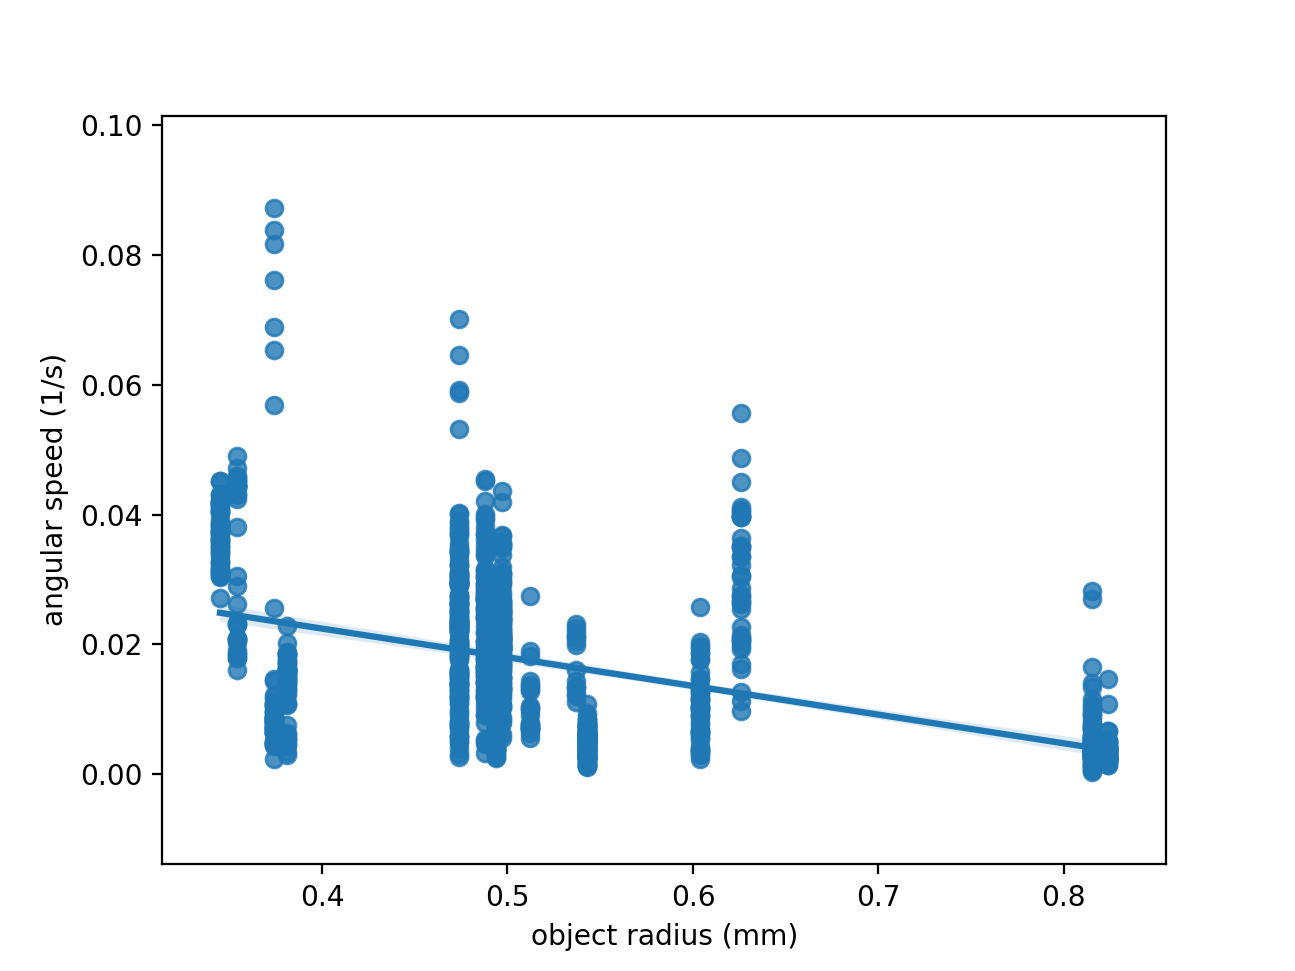

In [102]:
plt.figure()
sns.regplot(x="object radius (mm)", y="angular speed (1/s)", data=df)
plt.show()